<a href="https://colab.research.google.com/github/shwetha-bharadwaj/QT_Simulation/blob/main/QTSim_exec_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install simpy

In [ ]:
means

{'payor revenue': array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.30000e+02,
        4.40000e+02, 3.49900e+04, 4.87800e+04, 3.41700e+04, 5.95900e+04,
        5.44200e+04, 9.91900e+04, 9.08200e+04, 1.22260e+05, 1.35570e+05,
        1.41300e+05, 1.61440e+05, 1.68440e+05, 2.27180e+05, 3.22160e+05,
        2.98570e+05, 2.99270e+05, 3.55810e+05, 3.90180e+05, 4.26540e+05,
        4.67970e+05, 5.01180e+05, 5.40890e+05, 5.66140e+05, 5.87140e+05,
        6.26480e+05, 7.22650e+05, 7.15750e+05, 7.18790e+05, 7.45970e+05,
        8.78430e+05, 8.67040e+05, 9.16470e+05, 9.52750e+05, 1.03031e+06,
        1.07396e+06, 1.07746e+06, 1.15728e+06, 1.25150e+06, 1.25206e+06,
        1.26182e+06, 1.27702e+06, 1.39526e+06, 1.45574e+06, 1.46958e+06,
        1.54902e+06, 1.60355e+06, 1.62050e+06, 1.66282e+06, 1.71466e+06,
        1.84378e+06, 1.77482e+06, 1.79802e+06, 1.85818e+06, 1.98154e+06,
        1.96650e+06, 2.07930e+06, 

In [2]:
import pandas as pd
Q3_2023_dom_flights_df = pd.read_excel('https://docs.google.com/spreadsheets/d/1EYT38ze9qzTfjSJT0Z9JtXgz3ZsaBdZ9/export?gid=381557919&format=xlsx', names=['2022 Passenger Rank'	,'Airport Code'	,'City Name'	,'State Name'	,'Average Fare ($)','Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)'],header=None)

In [3]:
# class TherapistStorePut(simpy.resources.resource.Release):
#     """Request to put *item* into the *store*. The request is triggered once
#     there is space for the item in the store.

#     """

#     def __init__(self, store: simpy.resources.store.Store, item: Any):
#         self.item = item
#         """The item to put into the store."""
#         super().__init__(store)

# class PriorityTherapistGet(simpy.resources.resource.Request):

#     def __init__(self, resource, priority=10, preempt=True):
#         self.priority = priority
#         """The priority of this request. A smaller number means higher
#         priority."""

#         self.preempt = preempt
#         """Indicates whether the request should preempt a resource user or not
#         (:class:`PriorityResource` ignores this flag)."""

#         self.time = resource._env.now
#         """The time at which the request was made."""

#         self.usage_since = None
#         """The time at which the request succeeded."""

#         self.key = (self.priority, self.time, not self.preempt)
#         """Key for sorting events. Consists of the priority (lower value is
#         more important), the time at which the request was made (earlier
#         requests are more important) and finally the preemption flag (preempt
#         requests are more important)."""

#         super().__init__(resource)
# class PreemptiveTherapistResource(simpy.resources.resource.PriorityResource):
#     """A :class:`~simpy.resources.resource.PriorityResource` with preemption.

#     If a request is preempted, the process of that request will receive an
#     :class:`~simpy.exceptions.Interrupt` with a :class:`Preempted` instance as
#     cause.

#     """

#     users: List[PriorityTherapistGet]  # type: ignore

#     def _do_put(  # type: ignore[override]
#         self, event: PriorityTherapistGet
#     ) -> None:
#         if len(self.users) >= self.capacity and event.preempt:
#             # Check if we can preempt another process
#             preempt = sorted(self.users, key=lambda e: e.key)[-1]
#             if preempt.key > event.key:
#                 self.users.remove(preempt)
#                 preempt.proc.interrupt(  # type: ignore
#                     simpy.resources.resource.Preempted(
#                         by=event.proc,
#                         usage_since=preempt.usage_since,
#                         resource=self,
#                     )
#                 )

#         return super()._do_put(event)

# class PreemptiveBaseStore(simpy.resources.store.Store):
#     def __init__(self,env,capacity,items):
#       super().__init__(env,capacity)
#       self.items = items
#     GetQueue = simpy.resources.resource.SortedQueue

#     get = BoundClass(PriorityTherapistGet)
#     put = BoundClass(TherapistStorePut)

#     def funding_put(self,total_resources):
#       self.items=total_resources

In [53]:
"""
we have 2 therapists
we sell to payors, this requires at least 1 therapist
each month cdf of poisson binomial (non IID) or binomial or hypergeometric (without replacement and therefore nonIID)
when we sell to payors 1 therapist is occupied for 1 month with onboarding 1 in-network provider
we then wait 2 months for results to come out, the payor is projected to pay (550*2) for the next two months
then we assume the payor likes the results and wants us to onboard the other 4 in-network providers & implement within them
  however 1 therapist needs to be occupied 1 month with each to on-board, but it is paid
  550 per month per provider + upfront half of storage cost of 9600 for 12 months per provider
  550 per month + 7200 for 12 months for the 1st provider
EXPENSED AT BEGINNING OF MONTH BEFORE THERAPY
"""
import simpy
#therapist store since adding
from simpy.core import BoundClass
from typing import TYPE_CHECKING, Any, List, Optional, Type
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
from scipy.stats import norm
from queue import PriorityQueue
import numpy as np
rng = np.random.default_rng(420)


class QualiaTechnologies(object):
  # define the overall resources in our system
    def __init__(self, env):

        # set up the enviroment
        self.env = env
        ### COMMON DISTRIBUTIONS & VARIABLES
        self.conference_days_probs = [0,0.05,0.1,0.35,0.35,0.1,0.05]
        self.conference_days_limit = 6
        self.conference_fee_mu = 750
        self.conference_fee_sigma = 250
        #seo optimization is usually 5-10% of monthly revenue
        self.seo_expense_payor = .075
        self.seo_expense_payvider=.075
        self.flights_emp_dist = Q3_2023_dom_flights_df['Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)'].values
        self.adr_mu = 155.82
        self.adr_sigma = 88.52
        self.cost_of_living = 1.025
        self.group_size=10
        self.cbtech_we_half_storage_price = 20
        self.revenue_projection_mos = 73
        self.employee_overhead_perc = .25
        self.series_seed_mo = 12
        self.series_A_mo = 24
        self.series_B_mo = 40
        self.series_C_mo = 54
        self.series = [self.series_seed_mo,self.series_A_mo,self.series_B_mo,self.series_C_mo,self.revenue_projection_mos]
        self.between_series = []
        for i in range(len(self.series)-1):
          self.between_series.append(self.series[i+1]-self.series[i])
        self.round=0
        # TODO- MOVE TO SERIES A: self.expense_dict = {'cogs':[self.payor_cogs,self.payor_hosting,self.payvider_cogs,self.payvider_hosting],'sales':[self.payor_sales,self.payor_travel,self.payor_stay,self.payvider_sales,self.payvider_travel,self.payvider_stay]\
        # 'marketing':[self.payor_marketing,self.payvider_marketing,self.payor_digital_advertising,self.payor_seo,self.payor_conference_fees,self.payor_travel,self.payor_stay,self.payor_marketers,\
        #self.payvider_digital_advertising,self.payvider_seo,self.payvider_conference_fees,self.payvider_travel,self.payvider_stay,self.payvider_marketers],'rd':[self.payor_rd,self.payvider_rd],'ga':[self.hr,self.ceo,self.overhead]}
        self.salaries_dict = {'sr_devops':(10333*.5),'jr_devops':(5516*.5),'customer_satisfaction_agents':3145,'therapists':6291,'account_executives':6395,'marketers':6291,'sr_frontend':11083,'jr_frontend':6416,'sr_data_scientists':11875,'jr_data_scientists':5208,'sr_uiux':11188,'jr_uiux':4625,'sr_backend':(10333*.5),'jr_backend':(5516*.5),'sr_qa':9750,'jr_qa':7020,'sr_clinical':4358,'sr_fullstack':10188,'jr_fullstack':6417\
                                      ,'sr_it':9829,'jr_it':5213,'hr':5354,'ceo':6395,'marketer':6291,'patient_success_account_execs':6395}
        self.all_wages_expense = {}
        self.init_wages_expense()
        #COMMON RESOURCES & DATA STRUCTURES-- only sales is different for staff!
        #not resources, just multiply by number in list during series
        self.common_staff_schedule = {'hr':[0,0,1,2,3],'ceo':[1,1,1,1,1]}
        self.ga_parts=['hr','ceo','overhead']
        self.segment_expenses_parts={'cogs':['wages','hosting'],'sales':['wages','travel','stay'],'marketing':['wages','digital_advertising','seo','conference_fees','travel','stay'],'rd':['wages','hosting']}
        self.segment_expenses_staff={'cogs':['customer_satisfaction_agents','sr_devops','jr_devops'],'marketing':['marketers'],'rd':['sr_frontend','jr_frontend','sr_data_scientists','jr_data_scientists','sr_uiux','jr_uiux','sr_backend','jr_backend','sr_qa','jr_qa','sr_clinical','sr_fullstack','jr_fullstack'\
                              ,'sr_it','jr_it']}
        self.segment_revenue_parts=['subscriptions','nre']
        self.expenses_parts=['cogs','sales','marketing','ga','rd']

        ### DICTS
        ### PRICING & OTHER EXPENSES (see expense dict)
        self.payor_sales_staff = ['therapists','account_executives']
        self.segment_expenses={}
        self.init_segment_expenses(typ='payor')
        # self.payor_expenses = {'cogs':{'wages':np.zeros(self.revenue_projection_mos),'hosting':np.zeros(self.revenue_projection_mos)},'sales':{'wages':np.zeros(self.revenue_projection_mos),'travel':np.zeros(self.revenue_projection_mos)\
        #                       ,'stay':np.zeros(self.revenue_projection_mos)},'marketing':{'wages':np.zeros(self.revenue_projection_mos),'digital_advertising':np.zeros(self.revenue_projection_mos),'seo':np.zeros(self.revenue_projection_mos)\
        #                       ,'conference_fees':np.zeros(self.revenue_projection_mos),'travel':np.zeros(self.revenue_projection_mos),'stay':np.zeros(self.revenue_projection_mos)},'rd':{'wages':np.zeros(self.revenue_projection_mos)}}

        self.segment_revenue={}
        self.init_segment_revenue(typ='payor')
        self.payor_expense_consts = {'groups_per_provider':8}
        self.payor_expense_consts['cbtech_we_mo']=55
        self.payor_expense_consts['hosting']=self.cbtech_we_half_storage_price*self.group_size*self.payor_expense_consts['groups_per_provider']*2
        self.payor_expense_consts['payor_churn']=.03
        self.payor_expense_consts['provider_churn']=.01
        self.payor_expense_consts['provider_nre_9']=self.cbtech_we_half_storage_price*self.group_size*self.payor_expense_consts['groups_per_provider']*9
        self.payor_expense_consts['provider_nre_12']=self.cbtech_we_half_storage_price*self.group_size*self.payor_expense_consts['groups_per_provider']*12
        self.payor_expense_consts['provider_cbtech_we_mo']=self.payor_expense_consts['cbtech_we_mo']*self.group_size*self.payor_expense_consts['groups_per_provider']
        ### TRACKING
        self.providers_in_waiting=PriorityQueue()
        self.providers_reached = {}
        self.num_payors_acquired = np.zeros(self.revenue_projection_mos)
        self.num_providers_churned = np.zeros(self.revenue_projection_mos)
        self.num_payors_churned = np.zeros(self.revenue_projection_mos)
        self.num_payors_total = np.zeros(self.revenue_projection_mos)
        self.num_providers_acquired = np.zeros(self.revenue_projection_mos)
        self.num_providers_total = np.zeros(self.revenue_projection_mos)
        self.num_payor_churn_start = 12
        ### RESOURCES -- human capital (remember: no resource for backend, but half of expense of cogs resources is r&d in any given month)
        self.payor_resources_schedule = {'therapists':[2,4,6,10,14],'account_executives':[1,2,3,5,8],'marketers':[1,2,3,3,4],'customer_satisfaction_agents':[0,3,8,12,17],'sr_devops':[1,1,2,2,2],'jr_devops':[0,1,2,2,2], 'sr_frontend':[1,1,2,2,2],'jr_frontend':[0,1,2,3,3],'sr_data_scientists':[1,1,2,2,2],'jr_data_scientists':[0,1,2,3,4],'sr_uiux':[1,1,2,2,2],'jr_uiux':[0,1,2,2,3],'sr_qa':[0,0,1,1,1],'jr_qa':[0,0,0,1,1],'sr_clinical':[1,1,2,2,2],'sr_fullstack':[0,0,1,1,1],'jr_fullstack':[0,0,0,1,2]\
        ,'sr_it':[0,1,1,2,2],'jr_it':[0,0,1,1,2]}
        self.payor_resources = {}
        self.set_segment_resources(typ='payor')
        ### PAYVIDERS
        self.payvider_sales_staff = ['therapists','account_executives','patient_success_account_execs']
        self.init_segment_expenses(typ='payvider')
        self.init_segment_revenue(typ='payvider')
        self.payvider_expense_consts = {'groups_per_hospital':12}
        self.payvider_expense_consts['cbtech_we_mo']=65
        self.payvider_expense_consts['hosting']=self.cbtech_we_half_storage_price*self.group_size*self.payvider_expense_consts['groups_per_hospital']*2
        self.payvider_expense_consts['payvider_churn']=.01
        self.payvider_expense_consts['hospital_churn']=.01
        self.payvider_expense_consts['hospital_nre_9']=self.cbtech_we_half_storage_price*self.group_size*self.payvider_expense_consts['groups_per_hospital']*9
        self.payvider_expense_consts['hospital_nre_12']=self.cbtech_we_half_storage_price*self.group_size*self.payvider_expense_consts['groups_per_hospital']*12
        self.payvider_expense_consts['hospital_cbtech_we_mo']=self.payvider_expense_consts['cbtech_we_mo']*self.group_size*self.payvider_expense_consts['groups_per_hospital']
        #TRACKING
        self.idn_hospitals_in_waiting=PriorityQueue()
        self.hospitals_reached = {}
        self.num_idns_acquired = np.zeros(self.revenue_projection_mos)
        self.num_hospitals_churned = np.zeros(self.revenue_projection_mos)
        self.num_payviders_churned = np.zeros(self.revenue_projection_mos)
        self.num_payviders_total = np.zeros(self.revenue_projection_mos)
        self.num_hospitals_acquired = np.zeros(self.revenue_projection_mos)
        self.num_hospitals_total = np.zeros(self.revenue_projection_mos)
        self.num_payvider_churn_start =10
        ### RESOURCES -- human capital (remember: no resource for backend, but half of expense of cogs resources is r&d in any given month)
        self.payvider_resources_schedule = {'therapists':[0,0,5,15,30],'account_executives':[0,0,1,4,8],'patient_success_account_execs':[0,0,1,4,8],'marketers':[0,0,2,4,8],'customer_satisfaction_agents':[0,0,5,10,25],'sr_devops':[0,0,1,2,3],'jr_devops':[0,0,0,1,4], 'sr_frontend':[0,0,1,2,3],'jr_frontend':[0,0,0,1,2],'sr_data_scientists':[0,0,1,2,3],'jr_data_scientists':[0,0,0,1,1],'sr_uiux':[0,0,1,2,3],'jr_uiux':[0,0,0,1,1],'sr_qa':[0,0,1,1,2],'jr_qa':[0,0,0,1,1],'sr_clinical':[0,0,1,1,2],'sr_fullstack':[0,0,0,1,2],'jr_fullstack':[0,0,0,0,1]\
        ,'sr_it':[0,0,1,2,3],'jr_it':[0,0,0,1,1]}
        self.payvider_resources = {}
        # id of payor acquired-- do i use this?
        self.payors = []
        self.idns = []
        self.providers_popped = {}
        self.payors_popped = []
        self.idn_hospitals_popped = {}
        self.idns_popped = []
        # set up therapists as a preemptive resource: capacity 1 before series seed at 18 months, then 3, then 6 at month 36
        # they'll be onboarding people, but customer acquisition takes precedence
        # self.payor_therapists = simpy.PreemptiveResource(env, 2)
        # self.therapists = simpy.PreemptiveResource(env, 2)
        #self.therapist_store = PreemptiveBaseStore(self.env,items=PreemptiveTherapistResource(self.env,capacity=2))

        #acct exec store since adding
        # set up account execs as a resource - capacity 1 initially, but after 36 months, each can acquire a payor simultaneously
        # self.payor_account_execs = simpy.Resource(env, 1)
        # self.account_execs = simpy.Resource(env, 1)

        #marketing team- 1 at start, 2 at seed, 4 at A, 8 at B
        #hit 1 conference per month, so many, each spans 1-4 days total, majority 3 & 4 days/nights, always 2 flights
        #entrance fee really ranges from 500-1000, sometimes more, sometimes free. assume normal dist mu = 750, sigma = 250, 95% covered 250 and 1250


        #COGS = devops*.5 + hosting + customer satisfaction
        #segment specific resources assigned at appr. series
        # self.payor_sr_devops = simpy.Resource(env,1)

        #TODO -- other digital marketing and multimedia adverts expense as buffer in case cac doesnt burn ltv enough
        #1 at start (doubles as backend), 1 jr hire at seed, 1 sr at a, 2 jr hires at b
        # self.sr_devops = simpy.Resource(env,1)
        # env.process(self.churn_payor())
        # env.process(self.churn_provider())
        # self.series_seed_proc = env.process(self.series_seed(env))
        # self.sS = False
        # env.process(self.series_seed(self.series_seed_mo))
        # # self.series_A_proc = env.process(self.series_A(env))
        # self.sA = False
        # env.process(self.series_A(self.series_A_mo))
        # self.sB = False
        # env.process(self.series_B(self.series_B_mo))

        #COMMON MAPPING (only thing segment specific is sales team)
        # initially only payors, only series A payvider
        self.expenses={}
        self.revenue={}
        self.init_expenses()
        self.init_revenue()

    def set_segment_sales_resources(self,round=0,typ='payor'):
      #need to hire the salespeople first, then subtract the next financing month update from env now to get breadth of time
      #then divide number of remaining hires over breadth of time to get interval over which each hire must be made
      if typ=='payor':
        for i in self.payor_resources_schedule.keys():
          if i in self.payor_sales_staff:
            self.payor_resources[i]=None
            cap = self.payor_resources_schedule[i][round]
            print(f'PAYOR CAP: {cap}')
            if i == 'therapists':
              self.payor_resources['therapists']=simpy.PreemptiveResource(self.env,cap)
            else:
              if cap !=0:
                self.payor_resources[i] = simpy.Resource(self.env,cap)
      else:
        for i in self.payvider_resources_schedule.keys():
          if i in self.payvider_sales_staff:
            self.payvider_resources[i]=None
            cap = self.payvider_resources_schedule[i][round]
            if i == 'therapists':
              self.payvider_resources['therapists']=simpy.PreemptiveResource(self.env,cap)
            else:
              if cap !=0:
                self.payvider_resources[i] = simpy.Resource(self.env,cap)

    def get_num_new_hires_and_idxs(self,round,typ):
      def list_duplicates_of(seq,item):
        start_at = -1
        locs = []
        while True:
            try:
                loc = seq.index(item,start_at+1)
            except ValueError:
                break
            else:
                locs.append(loc)
                start_at = loc
        return locs
      if typ=='payor':
        print(f'do i get here')
        new_hires_schedule=np.linspace(1,self.between_series[round-1],len(self.payor_new_hires),dtype=int,endpoint=False).tolist()
        self.payor_new_hires_schedule={}
        for i in np.arange(len(self.payor_new_hires)):
          dups = list_duplicates_of(new_hires_schedule,i)
          self.payor_new_hires_schedule[i]=[]
          for j in dups:
            self.payor_new_hires_schedule[i].append(self.payor_new_hires[j])
      else:
        new_hires_schedule=np.linspace(1,self.between_series[round-1],np.sum(len(self.payvider_new_hires)),dtype=int,endpoint=False).tolist()
        self.payvider_new_hires_schedule={}
        for i in np.arange(len(self.payvider_new_hires)):
          dups = list_duplicates_of(new_hires_schedule,i)
          self.payvider_new_hires_schedule[i]=[]
          for j in dups:
            self.payvider_new_hires_schedule[i].append(self.payvider_new_hires[j])

    def make_new_hires_payor(self):
      for i in self.payor_new_hires_schedule.keys():
        yield env.timeout(i)
        for j in self.payor_new_hires_schedule[i]:
          cap = 0
          if self.payor_resources.get(j,None) != None:
            cap=self.payor_resources[j].capacity
          self.payor_resources[j] = simpy.Resource(self.env,cap+1)
    def make_new_hires_payvider(self):
      for i in self.payvider_new_hires_schedule.keys():
        yield env.timeout(i)
        for j in self.payvider_new_hires_schedule[i]:
          cap = 0
          if self.payvider_resources.get(j,None) != None:
            cap=self.payvider_resources[j].capacity
          self.payvider_resources[j] = simpy.Resource(self.env,cap+1)
    # def make_new_hires_payor(self,i):
    #   while True:
    #     yield self.env.timeout(i)
    #     # if self.env.now==k:
    #   # for i in self.payor_new_hires_schedule.keys():
    #   #   env.timeout(i)
    #     for j in self.payor_new_hires_schedule[i]:
    #       cap = 0
    #       if self.payor_resources.get(j,None) != None:
    #         cap=self.payor_resources[j].capacity
    #       self.payor_resources[j] = simpy.Resource(self.env,cap+1)

    # def make_new_hires_payvider(self,i):
    #   while True:
    #     yield self.env.timeout(i)
    #     for j in self.payvider_new_hires_schedule[i]:
    #       cap = 0
    #       if self.payvider_resources.get(j,None) != None:
    #         cap=self.payvider_resources[j].capacity
    #       self.payvider_resources[j] = simpy.Resource(self.env,cap+1)
    def get_segment_other_hires_resources(self,round=0,typ='payor'):
      #need to hire the salespeople first, then access between series
      #then divide number of remaining hires over breadth of time to get interval over which each hire must be made & set hiring schedule for non-yielding/locked process
      if typ=='payor':
        self.payor_new_hires = []
        for i in self.payor_resources_schedule.keys():
          if i not in self.payor_sales_staff:
            #self.payor_resources[i]=None
            cap = self.payor_resources_schedule[i][round]
            # print(f'PAYOR CAP: {cap}')
            if cap !=0:
                self.payor_new_hires+=([i]*cap)
        #shuffle payor_new_hires
        rng.shuffle(self.payor_new_hires)
        #create dictionary where key is env.now + time after n steps to make k hires
        self.get_num_new_hires_and_idxs(round,typ)
      else:
        self.payvider_new_hires = []
        for i in self.payvider_resources_schedule.keys():
          if i not in self.payvider_sales_staff:
            #self.payvider_resources[i]=None
            cap = self.payvider_resources_schedule[i][round]
            print(f'PAYOR CAP: {cap}')
            if cap !=0:
                self.payvider_new_hires+=[i]*cap
        rng.shuffle(self.payvider_new_hires)
        #create dictionary where key is env.now + time after n steps to make k hires
        self.get_num_new_hires_and_idxs(round,typ)
    def set_segment_resources(self,round=0,typ='payor'):
      #need to hire the salespeople first, then subtract the next financing month update from env now to get breadth of time
      #then divide number of remaining hires over breadth of time to get interval over which each hire must be made
      if typ=='payor':
        for i in self.payor_resources_schedule.keys():
            self.payor_resources[i]=None
            cap = self.payor_resources_schedule[i][round]
            print(f'PAYOR CAP: {cap}')
            if i == 'therapists':
              self.payor_resources['therapists']=simpy.PreemptiveResource(self.env,cap)
            else:
              if cap !=0:
                self.payor_resources[i] = simpy.Resource(self.env,cap)
      else:
        for i in self.payvider_resources_schedule.keys():
            self.payvider_resources[i]=None
            cap = self.payvider_resources_schedule[i][round]
            if i == 'therapists':
              self.payvider_resources['therapists']=simpy.PreemptiveResource(self.env,cap)
            else:
              if cap !=0:
                self.payvider_resources[i] = simpy.Resource(self.env,cap)

    def update_wages(self):
      for i in self.salaries_dict.keys():
        self.salaries_dict[i] = self.salaries_dict[i]*self.cost_of_living

    def init_segment_expenses(self,typ='payor'):
      if typ=='payor':
        self.segment_expenses['payor']={}
        for k,v in self.segment_expenses_parts.items():
          self.segment_expenses['payor'][k]={}
          for i in v:
            self.segment_expenses['payor'][k][i]=np.zeros(self.revenue_projection_mos)
      else:
        self.segment_expenses['payvider']={}
        for k,v in self.segment_expenses_parts.items():
          self.segment_expenses['payvider'][k]={}
          for i in v:
            self.segment_expenses['payvider'][k][i]=np.zeros(self.revenue_projection_mos)
    def update_wage_expenses_and_overhead(self,expense='marketing',typ='payor'):
      if expense=='sales':
        if typ=='payor':
          for i in self.payor_sales_staff:
            payor_cap = self.payor_resources.get(i,None)
            if payor_cap is not None:
              payor_cap_real=payor_cap.capacity
              if i=='account_executive' and self.env.now<self.series_A_mo:
                payor_cap_real -=1
              self.segment_expenses['payor'][expense]['wages'][self.env.now]+=(payor_cap_real)*self.salaries_dict[i]
              self.expenses[expense]['payor'][self.env.now]+=(payor_cap_real)*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=(payor_cap_real)*self.salaries_dict[i]
        else:
          for i in self.payvider_sales_staff:
            payvider_cap = self.payvider_resources.get(i,None)
            if payvider_cap is not None:
              payvider_cap_real=payvider_cap.capacity
              if i=='account_executive' and self.env.now>=self.series_A_mo:
                payvider_cap_real -=1
              self.segment_expenses['payvider'][expense]['wages'][self.env.now]+=(payvider_cap_real)*self.salaries_dict[i]
              self.expenses[expense]['payvider'][self.env.now]+=(payvider_cap_real)*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=(payvider_cap_real)*self.salaries_dict[i]
      else:
        for i in self.segment_expenses_staff[expense]:
          if i=='sr_backend':
            payor_cap = self.payor_resources.get('sr_devops',None)
            if payor_cap is not None:
              self.segment_expenses['payor'][expense]['wages'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payor'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
            payvider_cap = self.payvider_resources.get('sr_devops',None)
            if payvider_cap is not None:
              self.segment_expenses['payvider'][expense]['wages'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payvider'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
          elif i=='jr_backend':
            payor_cap = self.payor_resources.get('jr_devops',None)
            if payor_cap is not None:
              self.segment_expenses['payor'][expense]['wages'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payor'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
            payvider_cap = self.payvider_resources.get('jr_devops',None)
            if payvider_cap is not None:
              self.segment_expenses['payvider'][expense]['wages'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payvider'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
          else:
            payor_cap = self.payor_resources.get(i,None)
            if payor_cap is not None:
              self.segment_expenses['payor'][expense]['wages'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payor'][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payor_cap.capacity*self.salaries_dict[i]
            payvider_cap = self.payvider_resources.get(i,None)
            if payvider_cap is not None:
              self.segment_expenses['payvider'][expense]['wages'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.expenses[expense]['payvider'][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
              self.all_wages_expense[i][self.env.now]+=payvider_cap.capacity*self.salaries_dict[i]
      self.expenses['ga']['overhead'][self.env.now]+=(self.segment_expenses['payvider'][expense]['wages'][self.env.now]*self.employee_overhead_perc)
      self.expenses['ga']['overhead'][self.env.now]+=(self.segment_expenses['payor'][expense]['wages'][self.env.now]*self.employee_overhead_perc)

    def init_wages_expense(self):
      for k in self.salaries_dict.keys():
        self.all_wages_expense[k]=np.zeros(self.revenue_projection_mos)

    def init_segment_revenue(self,typ='payor'):
      if typ=='payor':
        self.segment_revenue['payor']={}
        for i in self.segment_revenue_parts:
          self.segment_revenue['payor'][i]=np.zeros(self.revenue_projection_mos)
      else:
        self.segment_revenue['payvider']={}
        for i in self.segment_revenue_parts:
          self.segment_revenue['payvider'][i]=np.zeros(self.revenue_projection_mos)

    def init_expenses(self):
      for i in self.expenses_parts:
        self.expenses[i]={}
        if i != 'ga':
          for j in ['payor','payvider']:
            self.expenses[i][j]=np.zeros(self.revenue_projection_mos)
        else:
          for k in self.ga_parts:
            self.expenses[i][k]=np.zeros(self.revenue_projection_mos)

    def init_revenue(self):
      for i in ['payor','payvider']:
        self.revenue[i]={}
        for j in self.segment_revenue_parts:
          self.revenue[i][j]=np.zeros(self.revenue_projection_mos)


    def broadcast_helper(self,arr,proj):
        return np.broadcast_to(arr,(proj,*arr.shape)).copy()

    def series_seed(self):
        print(f'Series seed at {self.env.now}')
        #update all resources (for payors)
        self.round=1
        #self.set_segment_resources(round=1,typ='payor')
        self.set_segment_sales_resources(round=1,typ='payor')
        self.get_segment_other_hires_resources(round=1,typ='payor')
        #update all wages for cost of living
        self.update_wages()
        yield self.env.timeout(0)

    def series_A(self):
        print(f'Series A at {self.env.now}')
        #update resources for payviders
        self.round=2
        self.set_segment_sales_resources(round=2,typ='payor')
        self.get_segment_other_hires_resources(round=2,typ='payor')
        # self.set_segment_sales_resources(round=2,typ='payvider')
        # self.get_segment_other_hires_resources(round=2,typ='payvider')
        self.set_segment_resources(round=2,typ='payvider')
        # #update resources for payors
        # self.set_segment_resources(round=2,typ='payor')
        #update all wages for cost of living
        self.update_wages()
        yield self.env.timeout(0)

    def series_B(self):
        print(f'Series B at {self.env.now}')
        #update resources for payviders
        self.round=3
        self.set_segment_sales_resources(round=self.round,typ='payor')
        self.get_segment_other_hires_resources(round=self.round,typ='payor')
        self.set_segment_sales_resources(round=self.round,typ='payvider')
        self.get_segment_other_hires_resources(round=self.round,typ='payvider')
        #update all wages for cost of living
        self.update_wages()
        yield self.env.timeout(0)

    def series_C(self):
        print(f'Series C at {self.env.now}')
        #update resources for payviders
        self.round=4
        self.set_segment_sales_resources(round=self.round,typ='payor')
        self.get_segment_other_hires_resources(round=self.round,typ='payor')
        self.set_segment_sales_resources(round=self.round,typ='payvider')
        self.get_segment_other_hires_resources(round=self.round,typ='payvider')
        # self.set_segment_resources(round=4,typ='payvider')
        # #update resources for payors
        # self.set_segment_resources(round=4,typ='payor')
        #update all wages for cost of living
        self.update_wages()
        yield self.env.timeout(0)


    #solely due to payvider sales hires rate-limiting making ltv/cac dip
    # def tail_end_payvider_execs_hires(self):
    #   curr_cap_acct_exec = self.payvider_resources['account_executives'].capacity
    #   curr_cap_patient_succ = self.payvider_resources['patient_success']
    #   self.payvider_resources['therapists']=simpy.PreemptiveResource(self.env,cap)


    #setup churns

    # define how long a payor takes for deal to close
    def close(self, id,typ='payor'):
        if typ == 'payvider':
          #expenses are 6 flights for 3-person sales team
          flight_expense = 6*rng.choice(a=self.flights_emp_dist,size=1)[0]
          #hotel stay for 2 weeks for 3-person
          hotel_expense = (3*norm(self.adr_mu,self.adr_sigma).rvs(size=1)[0]*12)
          self.segment_expenses['payvider']['sales']['travel'][self.env.now]+=flight_expense
          self.segment_expenses['payvider']['sales']['stay'][self.env.now]+=hotel_expense
          self.expenses['sales']['payvider'][self.env.now]+=(hotel_expense+flight_expense)
        else:
          #expenses are 4 flights for 2-person sales team
          flight_expense = 4*rng.choice(a=self.flights_emp_dist,size=1)[0]
          #hotel stay for 2 weeks for 2-person
          hotel_expense = (2*norm(self.adr_mu,self.adr_sigma).rvs(size=1)[0]*12)
          self.segment_expenses['payor']['sales']['travel'][self.env.now]+=flight_expense
          self.segment_expenses['payor']['sales']['stay'][self.env.now]+=hotel_expense
          self.expenses['sales']['payor'][self.env.now]+=(hotel_expense+flight_expense)
        # self.expense[self.env.now]+=(flight_expense+hotel_expense)
        # self.travel_and_lodging_expense[self.env.now]+=(flight_expense+hotel_expense)
        yield self.env.timeout(1)
    # define how long a payor takes for their pilot provider to be onboarded
    def pilot_onboard(self, id,typ='payor'):
        #2 flights
        flight_expense = 2*rng.choice(a=self.flights_emp_dist,size=1)[0]
        # and 1 month hotel stay
        hotel_expense = (norm(self.adr_mu,self.adr_sigma).rvs(size=1)[0]*29)
        # self.expense[self.env.now]+=(self.hosting_expense_provider_mo+flight_expense+hotel_expense)
        # self.travel_and_lodging_expense[self.env.now]+=(flight_expense+hotel_expense)
        if typ=='payor':
          self.segment_expenses['payor']['sales']['travel'][self.env.now]+=flight_expense
          self.segment_expenses['payor']['sales']['stay'][self.env.now]+=hotel_expense
          self.expenses['sales']['payor'][self.env.now]+=(hotel_expense+flight_expense)
          # self.payor_cogs_mo[self.env.now]+=(np.sum(qt.payor_cogs_salaries[env.now]*qt.payor_cogs_capacities[env.now]))
          self.segment_expenses['payor']['cogs']['hosting'][self.env.now]+=(self.payor_expense_consts['hosting']/self.payor_expense_consts['groups_per_provider'])
          self.expenses['cogs']['payor'][self.env.now]+=(self.payor_expense_consts['hosting']/self.payor_expense_consts['groups_per_provider'])
          # self.payor_cogs_mo[self.env.now]+=qt.hosting_expense_provider_mo/qt.num_groups_per_provider
        else:
          self.segment_expenses['payvider']['sales']['travel'][self.env.now]+=flight_expense
          self.segment_expenses['payvider']['sales']['stay'][self.env.now]+=hotel_expense
          self.expenses['sales']['payvider'][self.env.now]+=(hotel_expense+flight_expense)
          # self.payor_cogs_mo[self.env.now]+=(np.sum(qt.payor_cogs_salaries[env.now]*qt.payor_cogs_capacities[env.now]))
          self.segment_expenses['payvider']['cogs']['hosting'][self.env.now]+=(self.payvider_expense_consts['hosting']/self.payvider_expense_consts['groups_per_hospital'])
          self.expenses['cogs']['payor'][self.env.now]+=(self.payvider_expense_consts['hosting']/self.payvider_expense_consts['groups_per_hospital'])
        yield self.env.timeout(1)
    # define how long a payor takes to see the results from their pilot group
    #revenue from subscriptions from last 2 months
    #revenue from upfront 9 month NRE (during pilot last month, month-end, while sub costs and future NREs are in provider process)
    #add payors and provider reached to resp. array and dict
    def pilot(self, id):
        print(f'Payor {id} 1st provider pilot begin at {self.env.now}')
        #immoral way
        # self.revenue['payor']['subscriptions'][self.env.now:self.env.now+2]+=self.payor_expense_consts['provider_cbtech_we_mo']
        # # self.payor_revenue[self.env.now]+=self.provider_cbtech_we_mo_price
        # # self.payor_revenue[self.env.now+1]+=self.provider_cbtech_we_mo_price
        # # self.expense[self.env.now]+=self.hosting_expense_provider_mo
        # # self.expense[self.env.now+1]+=self.hosting_expense_provider_mo
        # # self.payor_cogs_mo[self.env.now]+=self.hosting_expense_provider_mo
        # # self.payor_cogs_mo[self.env.now]+=(np.sum(qt.payor_cogs_salaries[env.now]*qt.payor_cogs_capacities[env.now]))
        # # self.payor_cogs_mo[self.env.now+1]+=self.hosting_expense_provider_mo
        # # self.payor_cogs_mo[self.env.now+1]+=(np.sum(qt.payor_cogs_salaries[env.now+1]*qt.payor_cogs_capacities[env.now+1]))
        # #TODO--need to add devops wages to these specific months
        # self.segment_expense['payor']['cogs']['hosting']+=self.payor_expense_consts['hosting']
        #right way
        self.revenue['payor']['subscriptions'][self.env.now:self.env.now+2]+=(self.payor_expense_consts['provider_cbtech_we_mo']/self.payor_expense_consts['groups_per_provider'])
        self.segment_expenses['payor']['cogs']['hosting'][self.env.now]+=(self.payor_expense_consts['hosting']/self.payor_expense_consts['groups_per_provider'])
        self.expenses['cogs']['payor'][self.env.now]+=(self.payor_expense_consts['hosting']/self.payor_expense_consts['groups_per_provider'])
        yield self.env.timeout(2)
        print(f'Payor {id} 1st provider pilot results at {self.env.now}')
        self.num_payors_acquired[self.env.now] += 1
        self.payors.append(id)
        print(f'payor acquired: {id}')
        self.providers_reached[(id,0)] = {'nre':np.zeros(self.revenue_projection_mos),'subscriptions':np.zeros(self.revenue_projection_mos)}
        self.providers_reached[(id,0)]['nre'][self.env.now]+=self.payor_expense_consts['provider_nre_9']
        self.providers_reached[(id,0)]['subscriptions'][self.env.now:]+=self.payor_expense_consts['provider_cbtech_we_mo']
        #step of 12 for 12 mo nre
        self.providers_reached[(id,0)]['nre'][self.env.now+9::12] += self.payor_expense_consts['provider_nre_12']
        self.num_providers_acquired[self.env.now]+=1
        # self.num_providers_total[self.env.now:] += 1
        #collect upfront money for 9 months & 550 a month since provider 1 is fully onboarded -- TODO
        #spawn 4 associated providers to providers to be serviced in queue
        #may have to put list around this
        #map(self.providers_reached.update,{(id,k):np.zeros(self.revenue_projection_mos) for k in range(1,5)})
        for i in range(1,6):
          self.providers_in_waiting.put((id,i))
          # self.providers_reached[(id,i)] = np.zeros(self.revenue_projection_mos)
        #list(map(self.providers_in_waiting.put,[(id, i) for i in range(1,5)]))
        print(f'Providers in waiting: {self.providers_in_waiting.queue}')
        self.revenue['payor']['subscriptions'][self.env.now:]+=self.providers_reached[(id,0)]['subscriptions'][self.env.now:]
        self.revenue['payor']['nre'][self.env.now:]+=self.providers_reached[(id,0)]['nre'][self.env.now:]
        # self.payor_revenue[self.env.now:]+=self.providers_reached[(id,0)][self.env.now:]
        #yield self.payor_ctrl
        # self.revenue[env.now-2] += self.cbtech_we_mo_price*self.group_size*self.num_groups_per_provider
        # self.revenue[env.now-1] += self.cbtech_we_mo_price*self.group_size*self.num_groups_per_provider
        # self.revenue[env.now] += self.cbtech_we_half_storage_price*self.group_size*self.num_groups_per_provider*9

    def idn_pilot(self, id):
        print(f'IDN {id} 1st hospital pilot begin at {self.env.now}')
        self.revenue['payvider']['subscriptions'][self.env.now:self.env.now+2]+=(self.payvider_expense_consts['hospital_cbtech_we_mo']/self.payvider_expense_consts['groups_per_hospital'])
        self.segment_expenses['payvider']['cogs']['hosting'][self.env.now]+=(self.payvider_expense_consts['hosting']/self.payvider_expense_consts['groups_per_hospital'])
        self.expenses['cogs']['payvider'][self.env.now]+=(self.payvider_expense_consts['hosting']/self.payvider_expense_consts['groups_per_hospital'])
        yield self.env.timeout(2)
        #TODO--need to add devops wages to these specific months
        print(f'IDN {id} 1st hospital pilot results at {self.env.now}')
        self.num_idns_acquired[self.env.now] += 1
        self.idns.append(id)
        print(f'IDN acquired: {id}')
        self.hospitals_reached[(id,0)] = {'nre':np.zeros(self.revenue_projection_mos),'subscriptions':np.zeros(self.revenue_projection_mos)}
        self.hospitals_reached[(id,0)]['nre'][self.env.now]+=self.payvider_expense_consts['hospital_nre_9']
        self.hospitals_reached[(id,0)]['subscriptions'][self.env.now:]+=self.payvider_expense_consts['hospital_cbtech_we_mo']
        #step of 12 for 12 mo nre
        self.hospitals_reached[(id,0)]['nre'][self.env.now+9::12] += self.payvider_expense_consts['hospital_nre_12']
        self.num_hospitals_acquired[self.env.now]+=1
        # self.num_idn_hospitals_total[self.env.now:] += 1
        #collect upfront money for 9 months & 550 a month since provider 1 is fully onboarded -- TODO
        #spawn 4 associated providers to providers to be serviced in queue
        #may have to put list around this
        #map(self.providers_reached.update,{(id,k):np.zeros(self.revenue_projection_mos) for k in range(1,5)})
        for i in range(1,50):
          self.idn_hospitals_in_waiting.put((id,i))
          # self.providers_reached[(id,i)] = np.zeros(self.revenue_projection_mos)
        #list(map(self.providers_in_waiting.put,[(id, i) for i in range(1,5)]))
        print(f'IDN Hospitals in waiting: {self.idn_hospitals_in_waiting.queue}')
        self.revenue['payvider']['subscriptions'][self.env.now:]+=self.hospitals_reached[(id,0)]['subscriptions'][self.env.now:]
        self.revenue['payvider']['nre'][self.env.now:]+=self.hospitals_reached[(id,0)]['nre'][self.env.now:]

    # define how long a non-pilot provider takes to be onboarded
    # def onboard(self, provider,providers_reached):
    #     yield self.env.timeout(1)
    #     providers_reached.append(provider)

    # define array per provider key:
    #pre-onboarding, fixed cost for 12 months of half of storage costs, after onbboarding, each mo for 12 months mo provider group sub cost
    def onboard(self, provider):
        #2 flights - TBD whether or not this is required -- could be some sort of incentive/sweetener scheme instead, etc. or could be curtailed
        flight_expense=2*rng.choice(a=self.flights_emp_dist,size=1)[0]
        # and 1 month hotel stay - TBD whether or not this is required
        hotel_expense=(norm(self.adr_mu,self.adr_sigma).rvs(size=1)[0]*29)
        self.segment_expenses['payor']['sales']['travel'][self.env.now]+=flight_expense
        self.segment_expenses['payor']['sales']['stay'][self.env.now]+=hotel_expense
        self.expenses['sales']['payor'][self.env.now]+=(hotel_expense+flight_expense)
        self.providers_reached[provider] = {'nre':np.zeros(self.revenue_projection_mos),'subscriptions':np.zeros(self.revenue_projection_mos)}
        self.providers_reached[provider]['nre'][self.env.now::12] += self.payor_expense_consts['provider_nre_12']
        self.providers_reached[provider]['subscriptions'][self.env.now:] += self.payor_expense_consts['provider_cbtech_we_mo']
        self.revenue['payor']['subscriptions'][self.env.now:]+=self.providers_reached[provider]['subscriptions'][self.env.now:]
        self.revenue['payor']['nre'][self.env.now:]+=self.providers_reached[provider]['nre'][self.env.now:]
        self.num_providers_acquired[self.env.now]+=1
        # self.num_providers_total[self.env.now:] += 1
        yield self.env.timeout(1)
        #yield self.provider_ctrl

    def idn_onboard(self, idn_hospital):
        #2 flights
        flight_expense=2*rng.choice(a=self.flights_emp_dist,size=1)[0]
        #and 1 month hotel stay
        hotel_expense=(norm(self.adr_mu,self.adr_sigma).rvs(size=1)[0]*29)
        # self.expense[self.env.now]+=(flight_expense+hotel_expense)
        # self.travel_and_lodging_expense[self.env.now]+=(flight_expense+hotel_expense)
        self.segment_expenses['payvider']['sales']['travel'][self.env.now]+=flight_expense
        self.segment_expenses['payvider']['sales']['stay'][self.env.now]+=hotel_expense
        self.expenses['sales']['payvider'][self.env.now]+=(hotel_expense+flight_expense)
        self.hospitals_reached[idn_hospital] = {'nre':np.zeros(self.revenue_projection_mos),'subscriptions':np.zeros(self.revenue_projection_mos)}
        self.hospitals_reached[idn_hospital]['nre'][self.env.now::12] += self.payvider_expense_consts['hospital_nre_12']
        self.hospitals_reached[idn_hospital]['subscriptions'][self.env.now:] += self.payvider_expense_consts['hospital_cbtech_we_mo']
        self.revenue['payvider']['subscriptions'][self.env.now:]+=self.hospitals_reached[idn_hospital]['subscriptions'][self.env.now:]
        self.revenue['payvider']['nre'][self.env.now:]+=self.hospitals_reached[idn_hospital]['nre'][self.env.now:]
        # self.payvider_revenue[self.env.now:] +=  self.idn_hospitals_reached[idn_hospital][self.env.now:]
        self.num_hospitals_acquired[self.env.now]+=1
        # self.num_idn_hospitals_total[self.env.now:] += 1
        yield self.env.timeout(1)




In [54]:
# payors = []
# providers_reached = []
# providers_in_waiting = []
# burn = []
# def setup(env):
#     # Note that these unique IDs are not required, but are included for eventual visualizations
#     global qt
#     qt = QualiaTechnologies(env)
#     payor_id = 0
#     # global payors
#     # global providers_reached
#     # global providers_in_waiting
#     while True:
#         print(f'env.now: {env.now}')
#         print(f'payor acquisition prob: {.25*((1+(.028))**env.now)}')
#         #payor acquisition is bernoulli with exponentially growing (>1) prob of success-- hits 1 at 50, calculate using https://www.omnicalculator.com/math/exponential-growth
#         payors_acquired = bernoulli.rvs(.25*((1+(.028))**env.now),size=qt.account_execs.capacity)
#         for payor_acquired in payors_acquired:
#           if payor_acquired:
#             #payors.append(payor_id)
#             qt.payors.append(payor_id)
#             #consists of deal close and onboard
#             #yield env.process(payor(env, payor_id, providers_reached, providers_in_waiting, qt))
#             env.process(payor(env, payor_id, qt))
#             payor_id += 1
#           else:
#             # payors.append(-1)
#             qt.payors.append(-1)
#         if len(providers_in_waiting) == 0 and qt.therapists.capacity > 0:
#           print(f'Business dev. in month: {env.now}')
#           yield env.timeout(1)
#         else:
#           print(f'Reached provider onboarding in month: {env.now}')
#           while len(providers_in_waiting) > 0:
#             env.process(provider(env,providers_in_waiting.pop(0), providers_reached,qt))

def setup(env):
    # Note that these unique IDs are not required, but are included for eventual visualizations
    global qt
    qt = QualiaTechnologies(env)
    payor_id = 0
    idn_id = 0
    # global payors
    # global providers_reached
    # global providers_in_waiting
    yield env.process(feasibility_study(env,qt))
    while True:
        env_start = env.now
        print(f'env.now: {env.now}')
        # print(f'payor acquisition prob: {.25*((1+(.028))**env.now)}')
        # print(f'Payor {id} 1st provider pilot process {env.active_process}')
        print(f'Payor resources {[qt.payor_resources[i].capacity for i in qt.payor_sales_staff]}')
        #payor acquisition is bernoulli with exponentially growing (>1) prob of success-- hits 1 at 45, calculate using https://www.omnicalculator.com/math/exponential-growth
        #payors_acquired = bernoulli.rvs(.25*((1+(.028))**env.now),size=qt.account_execs.capacity)
        # yield env.process(provider_churn(env,qt))
        #yield for series financings
        if env.now==qt.series_seed_mo:
          yield env.process(qt.series_seed())
          env.process(qt.make_new_hires_payor())
        elif env.now==qt.series_A_mo:
          yield env.process(qt.series_A())
          env.process(qt.make_new_hires_payor())
          # env.process(qt.make_new_hires_payvider())
        elif env.now==qt.series_B_mo:
          yield env.process(qt.series_B())
          env.process(qt.make_new_hires_payor())
          env.process(qt.make_new_hires_payvider())
        elif env.now==qt.series_C_mo:
          yield env.process(qt.series_C())
          env.process(qt.make_new_hires_payor())
          env.process(qt.make_new_hires_payvider())
        yield env.process(payor_churn(env,qt))
        # yield env.process(idn_hospital_churn(env,qt))
        # yield env.process(idn_churn(env,qt))
        yield env.process(all_expense_updates(env,qt))
        #yield env.process(hosting_expense(env,qt))
        for i in range(qt.payor_resources['marketers'].capacity):
          env.process(conference(env,qt,'payor'))
        if qt.round>1:
          for i in range(qt.payvider_resources['marketers'].capacity):
            env.process(conference(env,qt,'payvider'))
        if env.now == 0:
          env.process(payor(env, payor_id, qt))
          payor_id += 1
        else:
          p = 1 if .25*((1+(.0312))**env.now) >= 1 else .25*((1+(.0312))**env.now)
          payors_acquired = bernoulli.rvs(p,size=qt.payor_resources["account_executives"].capacity)
          print(f'payors acquired: {payors_acquired}')
          for payor_acquired in payors_acquired:
            if payor_acquired:
              #payors.append(payor_id)
              #qt.payors.append(payor_id)
              #consists of deal close and onboard
              #yield env.process(payor(env, payor_id, providers_reached, providers_in_waiting, qt))
              env.process(payor(env, payor_id, qt))
              payor_id += 1
              # payors.append(-1)
              #didn't get a payor this month
              print(f'IDN Providers in waiting: {qt.providers_in_waiting.queue}')
        if qt.round>1:
          if env.now==qt.series_A_mo:
            env.process(idn(env, idn_id, qt))
            idn_id += 1
          elif env.now >qt.series_A_mo:
            yield env.process(idn_churn(env,qt))
            # yield env.process(idn_hospital_churn(env,qt))
            #gets to .333 after 2 years
            print(f'idn acquisition prob: {.25*((1+(.01206))**env.now)}')
            p2 = 1 if .25*((1+(.01206))**env.now) >= 1 else .25*((1+(.01206))**env.now)
            idns_acquired = bernoulli.rvs(p2,size=qt.payvider_resources["account_executives"].capacity)
            print(f'idns acquired: {idns_acquired}')
            for idn_acquired in idns_acquired:
              if idn_acquired:
                #payors.append(payor_id)
                #qt.payors.append(payor_id)
                #consists of deal close and onboard
                #yield env.process(payor(env, payor_id, providers_reached, providers_in_waiting, qt))
                env.process(idn(env, idn_id, qt))
                idn_id += 1
                # payors.append(-1)
                #didn't get a payor this month
                print(f'IDN hospitals in waiting: {qt.idn_hospitals_in_waiting.queue}')
          print(f'Reached IDN hospital onboarding in month: {env.now}')
          print(f'IDN hospitals in waiting: {qt.idn_hospitals_in_waiting.queue}')
          if qt.idn_hospitals_in_waiting.qsize() == 0 and len(qt.payvider_resources["therapists"].queue) == qt.payvider_resources["therapists"].capacity:
            print(f'IDN Business dev. in month: {env.now}')
            yield env.timeout(1)
          while qt.idn_hospitals_in_waiting.qsize() > 0:
            env.process(idn_hospital(env,qt.idn_hospitals_in_waiting.get(),qt))
        if qt.providers_in_waiting.qsize() == 0 and len(qt.payor_resources["therapists"].queue) == qt.payor_resources["therapists"].capacity:
          print(f'Business dev. in month: {env.now}')
          yield env.timeout(1)
        else:
          print(f'Reached provider onboarding in month: {env.now}')
          print(f'Providers in waiting: {qt.providers_in_waiting.queue}')
          while qt.providers_in_waiting.qsize() > 0:
            env.process(provider(env,qt.providers_in_waiting.get(),qt))
        if env.now ==env_start:
          yield env.timeout(1)


# def payor(env, id, providers_reached, providers_in_waiting,qt):
#     # Deal close - request therapist with priority 1
#     acct_exec_req = qt.account_execs.request()
#     yield acct_exec_req
#     therapist_req = qt.therapists.request(priority=1)
#     yield therapist_req
#     # therapist = yield qt.therapist_store.get(priority=1)
#     yield env.process(qt.close(id))
#     print(f'Payor {id} deal closed at {env.now}')
#     qt.account_execs.release(acct_exec_req)
#     # onboard pilot - already have therapist resource
#     yield env.process(qt.pilot_onboard(id))
#     #release therapist resource
#     qt.therapists.release(therapist_req)
#     # yield qt.therapist_store.put(therapist)
#     #wait for results to come out & assume with p = 1 for now that payor likes
#     yield env.process(qt.pilot(id))
#     print(f'Payor {id} 1st provider pilot results at {env.now}')
#     providers_reached.append((id,0))
#     #collect upfront money for 9 months & 550 a month since provider 1 is fully onboarded -- TODO
#     #spawn 4 associated providers to providers to be serviced
#     providers_in_waiting.extend([(id, i) for i in range(1,5)])
def idn(env, id, qt):
    # Deal close - request therapist with priority 1
    idn_acct_exec_req = qt.payvider_resources['account_executives'].request()
    yield idn_acct_exec_req
    idn_therapist_req = qt.payvider_resources['therapists'].request(priority=1)
    yield idn_therapist_req
    idn_patient_success_req = qt.payvider_resources['patient_success_account_execs'].request()
    yield idn_patient_success_req
    # therapist = yield qt.therapist_store.get(priority=1)
    yield env.process(qt.close(id,'payvider'))
    print(f'IDN {id} deal closed at {env.now}')
    qt.payvider_resources['account_executives'].release(idn_acct_exec_req)
    qt.payvider_resources['patient_success_account_execs'].release(idn_patient_success_req)
    # onboard pilot - already have therapist resource
    yield env.process(qt.pilot_onboard(id,'payvider'))
    #release therapist resource
    qt.payvider_resources['therapists'].release(idn_therapist_req)
    # yield qt.therapist_store.put(therapist)
    #wait for results to come out & assume with p = 1 for now that payor likes
    yield env.process(qt.idn_pilot(id))

def payor(env, id, qt):
    # Deal close - request therapist with priority 1
    acct_exec_req = qt.payor_resources['account_executives'].request()
    yield acct_exec_req
    therapist_req = qt.payor_resources['therapists'].request(priority=1)
    yield therapist_req
    # therapist = yield qt.therapist_store.get(priority=1)
    yield env.process(qt.close(id))
    print(f'Payor {id} deal closed at {env.now}')
    qt.payor_resources['account_executives'].release(acct_exec_req)
    # onboard pilot - already have therapist resource
    yield env.process(qt.pilot_onboard(id))
    #release therapist resource
    qt.payor_resources['therapists'].release(therapist_req)
    # yield qt.therapist_store.put(therapist)
    #wait for results to come out & assume with p = 1 for now that payor likes
    yield env.process(qt.pilot(id))

def provider(env, id, qt):
    # paid onboarding, just need a therapist, non-priority
    with qt.payor_resources['therapists'].request(priority=2,preempt=False) as req:
      try:
        print(f'Provider {id} requesting therapist')
        yield req
        print(f'Provider {id} obtained therapist')
        print(f'Provider {id} non-pilot attempt at onboarding at {env.now}')
        print(f'Provider id {id}')
        yield env.process(qt.onboard(id))
      except simpy.Interrupt as interrupt:
        by = interrupt.cause.by
        usage = env.now - interrupt.cause.usage_since
        print(f'provider non-pilot attempt at onboarding got preempted by {by} at {env.now}' f' after {usage}')
        print(f'Provider {id} non-pilot attempt at onboarding at {env.now} interrupted!')

def idn_hospital(env, id, qt):
    # paid onboarding, just need a therapist, non-priority
    with qt.payvider_resources['therapists'].request(priority=2,preempt=False) as req:
      try:
        #print(f'IDN Hospital {id} requesting therapist')
        yield req
        #print(f'IDN Hospital {id} obtained therapist')
        #print(f'IDN Hospital {id} non-pilot attempt at onboarding at {env.now}')
        #print(f'IDN Hospital id {id}')
        yield env.process(qt.idn_onboard(id))
      except simpy.Interrupt as interrupt:
        by = interrupt.cause.by
        usage = env.now - interrupt.cause.usage_since
        #print(f'IDN Hospital non-pilot attempt at onboarding got preempted by {by} at {env.now}' f' after {usage}')
        #print(f'IDN Hospital {id} non-pilot attempt at onboarding at {env.now} interrupted!')

def provider_churn(env,qt):
  prov_ch = np.floor(qt.provider_churn*len(qt.providers_reached.keys()))
  if env.now >= 24 and np.floor(qt.payor_churn*len(qt.payors)) < 1 and prov_ch>0:
    qt.providers_churned[env.now] = prov_ch
    # qt.num_providers_total[env.now:] -= qt.providers_churned[env.now]
    chrnd = rng.choice(list(qt.providers_reached.keys()),replace=False,size=int(prov_ch))
    for i in chrnd:
      qt.payor_revenue[env.now:] -= qt.providers_reached[tuple(i)][env.now:]
      qt.providers_popped[tuple(i)] = qt.providers_reached.pop(tuple(i),None)
      qt.providers_popped[tuple(i)][env.now:] = 0
  yield env.timeout(0)

def idn_hospital_churn(env,qt):
  ih_ch = np.floor(qt.idn_hospital_churn*len(qt.idn_hospitals_reached.keys()))
  if env.now >= 48 and np.floor(qt.idn_churn*len(qt.idns)) < 1 and ih_ch>0:
    qt.idn_hospitals_churned[env.now] = ih_ch
    # qt.num_idn_hospitals_total[env.now:] -= qt.idn_hospitals_churned[env.now]
    chrnd = rng.choice(list(qt.idn_hospitals_reached.keys()),replace=False,size=int(ih_ch))
    for i in chrnd:
      qt.payvider_revenue[env.now:] -= qt.idn_hospitals_reached[tuple(i)][env.now:]
      qt.idn_hospitals_popped[tuple(i)] = qt.idn_hospitals_reached.pop(tuple(i),None)
      qt.idn_hospitals_popped[tuple(i)][env.now:] = 0
  yield env.timeout(0)

def payor_churn(env,qt):
  pay_ch = np.floor(qt.payor_expense_consts['payor_churn']*len(qt.payors))
  if len(qt.payors)>qt.num_payor_churn_start and pay_ch>0:
    qt.num_payors_churned[env.now] = pay_ch
    del_idxs = rng.choice(qt.payors,replace=False,size=int(pay_ch))
    for i in del_idxs:
      qt.payors_popped.append(i)
      for k in range(5):
        if qt.providers_reached.get((i,k),None) is not None:
          qt.revenue['payor']['subscriptions'][env.now:] -= qt.providers_reached[(i,k)]['subscriptions'][env.now:]
          qt.revenue['payor']['nre'][env.now:] -= qt.providers_reached[(i,k)]['nre'][env.now:]
        # qt.payor_revenue[env.now:] -= qt.providers_reached.get((i,k),np.zeros(qt.revenue_projection_mos))[env.now:]
        v = qt.providers_reached.pop((i,k),None)
        if v is not None:
          qt.providers_popped[(i,k)] = v
          qt.providers_popped[(i,k)]['nre'][env.now:] = 0
          qt.providers_popped[(i,k)]['subscriptions'][env.now:] = 0
        # qt.providers_reached.pop((i,k),None)
        qt.num_providers_churned[env.now]+=1
        # qt.num_providers_total[env.now:] -= 1
      for p in qt.providers_in_waiting.queue:
        if p[0] == i:
          qt.providers_in_waiting.queue.remove(p)
    qt.payors = [e for e in qt.payors if e not in del_idxs]
    temp=qt.providers_in_waiting.queue
    qt.providers_in_waiting=PriorityQueue()
    for i in temp:
      #print('i',i)
      qt.providers_in_waiting.put(i)
  qt.num_payors_total[env.now]=len(qt.payors)
  yield env.timeout(0)

def idn_churn(env,qt):
  idn_ch = np.floor(qt.payvider_expense_consts['payvider_churn']*len(qt.idns))
  # if (len(qt.idns) >= qt.num_payvider_churn_start) and idn_ch>0:
  if idn_ch>0:
    qt.num_payviders_churned[env.now] = idn_ch
    del_idxs = rng.choice(qt.idns,replace=False,size=int(idn_ch))
    for i in del_idxs:
      qt.idns_popped.append(i)
      for k in range(50):
        if qt.hospitals_reached.get((i,k),None) is not None:
          qt.revenue['payvider']['subscriptions'][env.now:] -= qt.hospitals_reached[(i,k)]['subscriptions'][env.now:]
          qt.revenue['payvider']['nre'][env.now:] -= qt.hospitals_reached[(i,k)]['nre'][env.now:]
        v = qt.hospitals_reached.pop((i,k),None)
        if v is not None:
          qt.idn_hospitals_popped[(i,k)] = v
          qt.idn_hospitals_popped[(i,k)]['nre'][env.now:] = 0
          qt.idn_hospitals_popped[(i,k)]['subscriptions'][env.now:] = 0
        # qt.idn_hospitals_reached.pop((i,k),None)
        qt.num_hospitals_churned[env.now]+=1
        # qt.num_idn_hospitals_total[env.now:] -= 1
      for p in qt.idn_hospitals_in_waiting.queue:
        if p[0] == i:
          qt.idn_hospitals_in_waiting.queue.remove(p)
    qt.idns = [e for e in qt.idns if e not in del_idxs]
    temp=qt.idn_hospitals_in_waiting.queue
    qt.idn_hospitals_in_waiting=PriorityQueue()
    for i in temp:
      #print('i',i)
      qt.idn_hospitals_in_waiting.put(i)
  qt.num_payviders_total[env.now]=len(qt.idns)
  yield env.timeout(0)

def all_expense_updates(env,qt):
  #wage expense- tracking error during financings because this gets called 1st, then financing, then retroactively component expenses use wage with cost of living increase
  print('expense update')
  #qt.expense[env.now]+=qt.wage_expense_mo[env.now]
  #retroactive seo expense as 7.5% of monthly revenue
  #marketing
  #TODO--update ga and qt.expense at teh end
  for i in ['payor','payvider']:
    seo_exp = qt.seo_expense_payor
    if i == 'payvider':
      seo_exp = qt.seo_expense_payvider
    #for marketing, conference fees traveling and stay is updated during processes, all thats left is seo (prospective, but dependent on last months revenue), digital marketing (if necessary)
    qt.segment_expenses[i]['marketing']['seo'][env.now]=(qt.revenue[i]['subscriptions'][env.now-1]+qt.revenue[i]['nre'][env.now-1])*seo_exp*.5
    qt.expenses['marketing'][i][env.now]+=(qt.revenue[i]['subscriptions'][env.now-1]+qt.revenue[i]['nre'][env.now-1])*seo_exp
    qt.segment_expenses[i]['marketing']['digital_advertising'][env.now]=(qt.revenue[i]['subscriptions'][env.now-1]+qt.revenue[i]['nre'][env.now-1])*seo_exp*.5
    for j in qt.segment_expenses_parts.keys():
      print(f'j:{j}')
      qt.update_wage_expenses_and_overhead(j,typ=i)
      # qt.expenses[j][i][env.now]+=qt.segment_expenses[i][j]['wages'][env.now]
      # for k in qt.segment_expenses[i][j].keys():
      #   # print(k)
      #   if k != 'wages':
      #     print(f'k:{k}')
      #     # print(f'env now:{env.now}')
      #     # print(qt.segment_expenses[i][j][k])
      #     print(f'seg exp:{qt.segment_expenses[i][j][k][env.now-1]}')
      #     print(f'exp:{qt.expenses[j][i][env.now-1]}')
      #     qt.expenses[j][i][env.now-1]+=qt.segment_expenses[i][j][k][env.now-1]
      # qt.expenses[j][i][env.now-1]+=(np.sum([qt.segment_expenses[i][j][k][env.now-1] for k in qt.segment_expenses[i][j].keys() if k!= 'wages']))
    qt.expenses['ga']['ceo'][env.now]+=qt.common_staff_schedule['ceo'][qt.round]*qt.salaries_dict['ceo']
    qt.all_wages_expense['ceo'][env.now]+=qt.common_staff_schedule['ceo'][qt.round]*qt.salaries_dict['ceo']
    qt.expenses['ga']['hr'][env.now]+=qt.common_staff_schedule['hr'][qt.round]*qt.salaries_dict['hr']
    qt.all_wages_expense['hr'][env.now]+=qt.common_staff_schedule['hr'][qt.round]*qt.salaries_dict['hr']
    qt.expenses['ga']['overhead'][env.now]+=(qt.employee_overhead_perc*qt.expenses['ga']['ceo'][env.now])
    qt.expenses['ga']['overhead'][env.now]+=(qt.employee_overhead_perc*qt.expenses['ga']['hr'][env.now])
    #hosting also updated after process
  # qt.update_marketing_expense()
  # if env.now > 0 and qt.payor_revenue[env.now-1]>0:
  #   qt.expense[env.now-1]+=qt.seo_expense*qt.payor_revenue[env.now-1]
  # if env.now > 0 and qt.payvider_revenue[env.now-1]>0:
  #   qt.expense[env.now-1]+=qt.seo_expense*qt.payvider_revenue[env.now-1]
  # #retroactive hosting and payments processing expense with total customer data not including churned & update totals
  # if env.now > 0:
  #   #could do a check here to revise back down the wage expense mo or TODO-- could keep array like everything else <- this.
  #   qt.num_idn_hospitals_total[env.now-1] = len(qt.idn_hospitals_reached)
  #   qt.num_providers_total[env.now-1] = len(qt.providers_reached)
  #   qt.expense[env.now-1]+=(qt.hosting_expense_idn_hospital_mo*qt.num_idn_hospitals_total[env.now-1]+qt.hosting_expense_provider_mo*qt.num_providers_total[env.now-1])
  #   #direct transfer, no credit card fee
  #   #qt.expense[env.now-1]+=qt.payments_processing_perc*qt.revenue[env.now-1]
  #   #cogs = hosting + payments processing + devops + customer satisfaction + contracting (don't need- hiring from the get go)
  #   qt.payor_cogs_mo[env.now-1]+=(qt.hosting_expense_provider_mo*qt.num_providers_total[env.now-1])
  #   qt.payvider_cogs_mo[env.now-1]+=(qt.hosting_expense_idn_hospital_mo*qt.num_idn_hospitals_total[env.now-1])
  #   # qt.cogs_mo[env.now-1]+=qt.payments_processing_perc*qt.revenue[env.now-1]
  #   # qt.cogs_mo[env.now-1]+=(np.sum(np.array(qt.cogs_salaries)*np.array(qt.cogs_capacities)))
  #   qt.payor_cogs_mo[env.now-1]+=(np.sum(qt.payor_cogs_salaries[env.now-1]*qt.payor_cogs_capacities[env.now-1]))
  #   qt.payvider_cogs_mo[env.now-1]+=(np.sum(qt.payvider_cogs_salaries[env.now-1]*qt.payvider_cogs_capacities[env.now-1]))
  #   #marketing = conference fees + conference travel + marketer wages + seo
  #   qt.marketing_expense_mo[env.now-1]+=qt.conference_expense[qt.env.now-1]
  #   qt.marketing_expense_mo[env.now-1]+=(np.sum(qt.marketing_salaries[env.now-1]*qt.marketing_capacities[env.now-1]))
  #   qt.marketing_expense_mo[env.now-1]+=qt.seo_expense*qt.payor_revenue[env.now-1]
  #   #sales = wages + sales travel + sales lodging
  #   qt.sales_expense_mo[env.now-1]+=qt.travel_and_lodging_expense[qt.env.now-1]
  #   qt.sales_expense_mo[env.now-1]+=(np.sum(qt.sales_salaries[env.now-1]*qt.sales_capacities[env.now-1]))
  #   #rd = wages
  #   qt.rd_expense_mo[env.now-1]+=(np.sum(qt.rd_salaries[env.now-1]*qt.rd_capacities[env.now-1]))
  #   #ga = overhead + my salary + hr
  #   qt.ga_expense_mo[env.now-1]+=(np.sum(qt.ga_salaries[env.now-1]*qt.ga_capacities[env.now-1]))
  #   qt.ga_expense_mo[env.now-1]+= qt.employee_overhead_perc*qt.wage_expense_mo[env.now-1]
  #   #update expense to get overhead
  #   qt.expense[env.now-1]+=qt.employee_overhead_perc*qt.wage_expense_mo[env.now-1]

  yield env.timeout(0)

def conference(env,qt,typ='payor'):
  if typ=='payor':
    marketer_req = qt.payor_resources['marketers'].request()
    yield marketer_req
  else:
    marketer_req = qt.payvider_resources['marketers'].request()
    yield marketer_req
  #variable number of days for conference & hotel spend
  conf_days = rng.choice(np.arange(qt.conference_days_limit+1),1,p=qt.conference_days_probs)[0]
  conf_hotel_spend = conf_days*norm(qt.adr_mu,qt.adr_sigma).rvs(size=1)[0]
  #variable entry fee
  conf_entry_fee = norm(qt.conference_fee_mu,qt.conference_fee_sigma).rvs(size=1)[0]
  #always 2 flights
  conf_flight_fee = 2*rng.choice(a=qt.flights_emp_dist,size=1)[0]
  #expense tally = conf hotel spend + conf entrance fee + conf travel spend
  if typ=='payor':
    qt.segment_expenses['payor']['marketing']['travel'][env.now]+=conf_flight_fee
    qt.expenses['marketing']['payor'][env.now]+=conf_flight_fee
    qt.segment_expenses['payor']['marketing']['stay'][env.now]+=conf_hotel_spend
    qt.expenses['marketing']['payor'][env.now]+=conf_hotel_spend
    qt.segment_expenses['payor']['marketing']['conference_fees'][env.now]+=conf_entry_fee
    qt.expenses['marketing']['payor'][env.now]+=conf_entry_fee
    yield env.timeout(1)
    qt.payor_resources['marketers'].release(marketer_req)
  else:
    qt.segment_expenses['payvider']['marketing']['travel'][env.now]+=conf_flight_fee
    qt.expenses['marketing']['payvider'][env.now]+=conf_flight_fee
    qt.segment_expenses['payvider']['marketing']['stay'][env.now]+=conf_hotel_spend
    qt.expenses['marketing']['payvider'][env.now]+=conf_hotel_spend
    qt.segment_expenses['payvider']['marketing']['conference_fees'][env.now]+=conf_entry_fee
    qt.expenses['marketing']['payvider'][env.now]+=conf_entry_fee
    yield env.timeout(1)
    qt.payvider_resources['marketers'].release(marketer_req)

def feasibility_study(env,qt):
  #front-fill all expenses for first six months (salaries, study cost --> why would this be material?, other), then yield for six months
  print(f'env.now: {env.now}')
  #directly put everything under rd for payor except ga with all payor hired workers
  for i in qt.segment_expenses_staff['rd']:
    if i=='sr_devops' or i=='jr_devops':
      qt.expenses['rd']['payor'][env.now:env.now+6]=(qt.expenses['rd']['payor'][env.now:env.now+6]+(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i]*2))
      qt.segment_expenses['payor']['rd']['wages'][env.now:env.now+6]+=(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i]*2)
      qt.all_wages_expense[i][env.now:env.now+6]=(qt.all_wages_expense[i][env.now:env.now+6]+(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i]*2))
    else:
      if i in qt.payor_resources_schedule.keys():
        qt.expenses['rd']['payor'][env.now:env.now+6]+=(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i])
        qt.segment_expenses['payor']['rd']['wages'][env.now:env.now+6]+=(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i])
        qt.all_wages_expense[i][env.now:env.now+6]=(qt.all_wages_expense[i][env.now:env.now+6]+(qt.payor_resources_schedule.get(i,0)[0]*qt.salaries_dict[i]))
  # print(qt.segment_expenses['payor']['rd']['wages'])
  # print(qt.expenses['rd']['payor'])
  qt.expenses['ga']['overhead'][env.now:env.now+6]+=(qt.segment_expenses['payor']['rd']['wages'][env.now:env.now+6]*(qt.employee_overhead_perc))
  qt.expenses['rd']['payor'][2]+=(qt.payor_expense_consts['hosting']/qt.payor_expense_consts['groups_per_provider'])
  qt.expenses['rd']['payor'][3]+=(qt.payor_expense_consts['hosting']/qt.payor_expense_consts['groups_per_provider'])
  qt.segment_expenses['payor']['rd']['hosting'][2]+=(qt.payor_expense_consts['hosting']/qt.payor_expense_consts['groups_per_provider'])
  qt.segment_expenses['payor']['rd']['hosting'][3]+=(qt.payor_expense_consts['hosting']/qt.payor_expense_consts['groups_per_provider'])
  yield env.timeout(6)
  print(f'env.now: {env.now}')

In [55]:
qts=[]
n=50
for i in range(n):
  env=simpy.Environment()
  env.process(setup(env))
  env.run(until=73)
  qts.append(qt)

Streaming output truncated to the last 5000 lines.
IDN 0 1st hospital pilot results at 28
IDN acquired: 0
IDN Hospitals in waiting: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49)]
env.now: 28
Payor resources [6, 3]
Payor 10 1st provider pilot begin at 28
Payor 11 1st provider pilot begin at 28
Payor 12 deal closed at 28
Payor 13 deal closed at 28
expense update
j:cogs
j:sales
j:marketing
j:rd
j:cogs
j:sales
j:marketing
j:rd
payors acquired: [1 0 0]
IDN Providers in waiting: [(9, 1), (9, 2), (9, 3), (9, 4), (9, 5)]
idn acquisition prob: 0.34971583752399066
idns acquired: [0]
Reached IDN hospital onboarding in

In [7]:
!pip install plotly==5.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 24.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [8]:
!pip install plotly_express==0.4.0

In [56]:
#Metrics table
segment_metrics_df = pd.DataFrame(columns=['LTV','CAC','LTV/CAC','ARPA'])
payvider_segment_metrics = {k:None for k in segment_metrics_df.columns}
payor_segment_metrics = {k:None for k in segment_metrics_df.columns}
#sensitivity analysis for discount, pbp will be nas then i guess NO CAC PBP!!
metrics_df = pd.DataFrame(columns=['PBP','DPBP'])
#also segmented, and if opex is needed only overhead is the significant expense which we know monthly is just 25% of wages (will apply to BES & RO40)
saas_metrics_df = pd.DataFrame(columns=['Magic Number','Bessemer Efficiency Score','Rule of 40','Revenue per Employee'])
payvider_saas_metrics = {k:None for k in saas_metrics_df.columns}
payor_saas_metrics = {k:None for k in saas_metrics_df.columns}

In [57]:
#ARR (Simulated n times)
#simulate
#for now, just line plot of revenue and expenses
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
pay_revs=[]
pay_exps=[]
pv_revs=[]
pv_exps=[]
ga_exps = []
total_12mo_revs=[]
total_12mo_pay_revs = []
total_12mo_pv_revs = []
total_12mo_pay_exps = []
total_12mo_pv_exps = []
total_12mo_exps=[]
for qt in qts:
  payor_revenue = qt.revenue['payor']['nre']+qt.revenue['payor']['subscriptions']
  pay_revs.append(payor_revenue)
  payvider_revenue = qt.revenue['payvider']['nre']+qt.revenue['payvider']['subscriptions']
  pv_revs.append(payor_revenue)
  rolling_12_mo_payor_rev = np.concatenate([np.zeros(11),np.convolve(payor_revenue,np.ones(12,dtype=int),'valid')])
  rolling_12_mo_payvider_rev = np.concatenate([np.zeros(11),np.convolve(payvider_revenue,np.ones(12,dtype=int),'valid')])
  total_12mo_pv_revs.append(rolling_12_mo_payvider_rev)
  total_12mo_pay_revs.append(rolling_12_mo_payor_rev)
  total_12mo_revs.append(rolling_12_mo_payor_rev +rolling_12_mo_payvider_rev)
  payor_expenses=np.zeros(qt.revenue_projection_mos)
  payvider_expenses=np.zeros(qt.revenue_projection_mos)
  for i in qt.segment_expenses_parts.keys():
    for j in qt.segment_expenses_parts[i]:
      payor_expenses+=qt.segment_expenses['payor'][i][j]
  pay_exps.append(payor_expenses)
  for i in qt.segment_expenses_parts.keys():
    for j in qt.segment_expenses_parts[i]:
      payvider_expenses+=qt.segment_expenses['payvider'][i][j]
  pv_exps.append(payvider_expenses)
  # payor_expenses= np.sum(np.array([qt.segment_expenses['payor'] for i in qt.segment_expenses_parts]),axis=0)
  # payvider_expenses = np.sum(np.array([qt.expenses[i]['payvider'] for i in qt.segment_expenses_parts]),axis=0)
  ga_expenses = np.sum(np.array([qt.expenses['ga'][i] for i in qt.ga_parts]),axis=0)
  ga_exps.append(ga_expenses)
  rolling_12_mo_payor_exp = np.concatenate([np.zeros(11),np.convolve(payor_expenses,np.ones(12,dtype=int),'valid')])
  rolling_12_mo_payvider_exp = np.concatenate([np.zeros(11),np.convolve(payvider_expenses,np.ones(12,dtype=int),'valid')])
  rolling_12_mo_ga_exp=np.concatenate([np.zeros(11),np.convolve(ga_expenses,np.ones(12,dtype=int),'valid')])
  total_12mo_pv_exps.append(rolling_12_mo_payvider_exp)
  total_12mo_pay_exps.append(rolling_12_mo_payor_exp)
  total_12mo_exps.append(rolling_12_mo_payor_exp+rolling_12_mo_payvider_exp+rolling_12_mo_ga_exp)

In [58]:
aggs=[pay_revs,
pay_exps,
pv_revs,
pv_exps,
ga_exps,
total_12mo_revs,
total_12mo_exps,
total_12mo_pv_revs,
total_12mo_pv_exps,
total_12mo_pay_revs,
total_12mo_pay_exps]
agg_names = ['payor revenue','payor expense','payvider revenue','payvider expense','ga expense','12 mo ytd rolling total revenue','12 mo ytd rolling total expense','12 mo ytd rolling total payvider revenue','12 mo ytd rolling total payvider expense','12 mo ytd rolling total payor revenue','12 mo ytd rolling total payor expense']
means={}
stdevs={}
for agg in range(len(aggs)):
  means[agg_names[agg]]=np.mean(np.array(aggs[agg]),axis=0)
  stdevs[agg_names[agg]]=np.std(np.array(aggs[agg]),axis=0)

In [59]:
#get the means for the component expenses per segment and add ga to em
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
#init
segment_payor_agg_expenses = {}
segment_payvider_agg_expenses = {}
ga_agg_expenses = {k:[] for k in qt.ga_parts}
agg_all_wages_expense = {k:[] for k in qt.all_wages_expense.keys()}
for key, values in qt.segment_expenses_parts.items():
    segment_payor_agg_expenses[key] = {k:[] for k in values}
    segment_payvider_agg_expenses[key] = {k:[] for k in values}
for qt in qts:
  for key, values in qt.segment_expenses_parts.items():
    for v in values:
      segment_payor_agg_expenses[key][v].append(qt.segment_expenses['payor'][key][v])
      segment_payvider_agg_expenses[key][v].append(qt.segment_expenses['payvider'][key][v])
  for k in qt.expenses['ga'].keys():
    ga_agg_expenses[k].append(qt.expenses['ga'][k])
  for k in qt.all_wages_expense.keys():
    agg_all_wages_expense[k].append(qt.all_wages_expense[k])

In [60]:
segment_payor_mean_expenses = {}
segment_payvider_mean_expenses = {}
ga_mean_expenses = {k:np.zeros(qt.expenses['ga'][k].shape[0]) for k in qt.ga_parts}
mean_all_wages_expense = {k:np.zeros(qt.all_wages_expense[k].shape[0]) for k in qt.all_wages_expense.keys()}
for key, values in qt.segment_expenses_parts.items():
    segment_payor_mean_expenses[key] = {v:np.zeros(qt.segment_expenses['payor'][key][v].shape[0]) for v in values}
    segment_payvider_mean_expenses[key] = {v:np.zeros(qt.segment_expenses['payvider'][key][v].shape[0]) for v in values}
for key, values in qt.segment_expenses_parts.items():
  for v in values:
    segment_payor_mean_expenses[key][v]=np.mean(np.array(segment_payor_agg_expenses[key][v]),axis=0)
    segment_payvider_mean_expenses[key][v]=np.mean(np.array(segment_payvider_agg_expenses[key][v]),axis=0)
  for k in qt.expenses['ga'].keys():
    ga_mean_expenses[k]=np.mean(np.array(ga_agg_expenses[k]),axis=0)
  for k in qt.all_wages_expense.keys():
    mean_all_wages_expense[k]=np.mean(np.array(agg_all_wages_expense[k]),axis=0)

In [61]:
#get the means for the churned # of customers & acquired customers
agg_num_payors_acquired = []
agg_num_providers_churned = []
agg_num_payors_churned = []
agg_num_payors_total = []
agg_num_providers_acquired = []
agg_num_providers_total = []
agg_num_idns_acquired = []
agg_num_hospitals_churned = []
agg_num_payviders_churned = []
agg_num_payviders_total = []
agg_num_hospitals_acquired = []
agg_num_hospitals_total = []
for qt in qts:
  agg_num_payors_acquired.append(qt.num_payors_acquired)
  agg_num_providers_churned.append(qt.num_providers_churned)
  agg_num_payors_churned.append(qt.num_payors_churned)
  agg_num_payors_total.append(qt.num_payors_total)
  agg_num_providers_acquired.append(qt.num_providers_acquired)
  agg_num_providers_total.append(qt.num_providers_total)
  agg_num_idns_acquired.append(qt.num_idns_acquired)
  agg_num_hospitals_churned.append(qt.num_hospitals_churned)
  agg_num_payviders_churned.append(qt.num_payviders_churned)
  agg_num_payviders_total.append(qt.num_payviders_total)
  agg_num_hospitals_acquired.append(qt.num_hospitals_acquired)
  agg_num_hospitals_total.append(qt.num_hospitals_total)

In [62]:
mean_num_payors_acquired = np.mean(np.array(agg_num_payors_acquired),axis=0)
mean_num_providers_churned = np.mean(np.array(agg_num_providers_churned),axis=0)
mean_num_payors_churned = np.mean(np.array(agg_num_payors_churned),axis=0)
mean_num_payors_total = np.mean(np.array(agg_num_payors_total),axis=0)
mean_num_providers_acquired = np.mean(np.array(agg_num_providers_acquired),axis=0)
mean_num_providers_total = np.mean(np.array(agg_num_providers_total),axis=0)
mean_num_idns_acquired = np.mean(np.array(agg_num_idns_acquired),axis=0)
mean_num_hospitals_churned = np.mean(np.array(agg_num_hospitals_churned),axis=0)
mean_num_payviders_churned = np.mean(np.array(agg_num_payviders_churned),axis=0)
mean_num_payviders_total = np.mean(np.array(agg_num_payviders_total),axis=0)
mean_num_hospitals_acquired = np.mean(np.array(agg_num_hospitals_acquired),axis=0)
mean_num_hospitals_total = np.mean(np.array(agg_num_hospitals_total),axis=0)

In [63]:
# mean_int_num_payors_acquired = np.floor(mean_num_payors_acquired)
# mean_int_num_providers_churned = np.floor(mean_num_providers_churned)
# mean_int_num_payors_churned = np.floor(mean_num_payors_churned)
# mean_int_num_payors_total = np.floor(mean_num_payors_total)
# mean_int_num_providers_acquired = np.floor(mean_num_providers_acquired)
# mean_int_num_providers_total = np.floor(mean_num_providers_total)
# mean_int_num_idns_acquired = np.floor(mean_num_idns_acquired)
# mean_int_num_hospitals_churned = np.floor(mean_num_hospitals_churned)
# mean_int_num_payviders_churned = np.floor(mean_num_payviders_churned)
# mean_int_num_payviders_total = np.floor(mean_num_payviders_total)
# mean_int_num_hospitals_acquired = np.floor(mean_num_hospitals_acquired)
# mean_int_num_hospitals_total = np.floor(mean_num_hospitals_total)
mean_int_num_payors_acquired = np.ceil(mean_num_payors_acquired)
mean_int_num_providers_churned = np.ceil(mean_num_providers_churned)
mean_int_num_payors_churned = np.ceil(mean_num_payors_churned)
mean_int_num_payors_total = np.ceil(mean_num_payors_total)
mean_int_num_providers_acquired = np.ceil(mean_num_providers_acquired)
mean_int_num_providers_total = np.ceil(mean_num_providers_total)
mean_int_num_idns_acquired = np.ceil(mean_num_idns_acquired)
mean_int_num_hospitals_churned = np.ceil(mean_num_hospitals_churned)
mean_int_num_payviders_churned = np.ceil(mean_num_payviders_churned)
mean_int_num_payviders_total = np.ceil(mean_num_payviders_total)
mean_int_num_hospitals_acquired = np.ceil(mean_num_hospitals_acquired)
mean_int_num_hospitals_total = np.ceil(mean_num_hospitals_total)

In [64]:

# rolling_12_mo_exp = np.concatenate([np.zeros(11),np.convolve(qt.expense[:72],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_cogs = np.concatenate([np.zeros(11),np.convolve(qt.cogs_mo[:72],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_mkt = np.concatenate([np.zeros(11),np.convolve(qt.marketing_expense_mo[:72],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_sales = np.concatenate([np.zeros(11),np.convolve(qt.sales_expense_mo[:72],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_rd = np.concatenate([np.zeros(11),np.convolve(qt.rd_expense_mo[:72],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_ga = np.concatenate([np.zeros(11),np.convolve(qt.ga_expense_mo[:72],np.ones(12,dtype=int),'valid')])
q_rev_markers = list(np.arange(2,72,3))
y_rev_markers = q_rev_markers[3::4]
q_rev_markers = list(np.arange(5,72,12))
#del q_rev_markers[::2]
# del q_rev_markers[:2:2]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
fig = go.Figure()
x=np.arange(72).tolist()
x_rev=x[::-1]
revs_stdevs_top = (means['12 mo ytd rolling total revenue']+2*stdevs['12 mo ytd rolling total revenue']).tolist()
revs_stdevs_bottom = (means['12 mo ytd rolling total revenue']-2*stdevs['12 mo ytd rolling total revenue']).tolist()
revs_stdevs_bottom = revs_stdevs_bottom[::-1]
exps_stdevs=(means['12 mo ytd rolling total expense']+2*stdevs['12 mo ytd rolling total expense']).tolist()+(means['12 mo ytd rolling total expense']-2*stdevs['12 mo ytd rolling total expense']).tolist()[::-1]
fig.add_trace(go.Scatter(
    x=x+x_rev,
    y=revs_stdevs_top+revs_stdevs_bottom,
    fill='toself',
    fillcolor='rgba(0,0,0,0.1)',
    line_color='rgba(255,255,255,0)',
    name='12 mo. YTD Total Revenue',
    showlegend=False,
))
fig.add_trace(go.Scatter(
    x=x+x_rev,
    y=exps_stdevs,
    fill='toself',
    fillcolor='rgba(220,20,60,0.2)',
    line_color='rgba(255,255,255,0)',
    name='12 mo. YTD Total Expenses',
    showlegend=False,
))
# fig.add_trace(go.Scatter(
#     x=x+x_rev,
#     y=y3_upper+y3_lower,
#     fill='toself',
#     fillcolor='rgba(231,107,243,0.2)',
#     line_color='rgba(255,255,255,0)',
#     showlegend=False,
#     name='Ideal',
# ))
fig.add_trace(go.Scatter(
    x=x, y=means['12 mo ytd rolling total revenue'],
    line_color='rgb(0,0,0)',
    name='12 mo. YTD Total Revenue',
))
fig.add_trace(go.Scatter(
    x=x, y=means['12 mo ytd rolling total expense'],
    line_color='rgb(220,20,60)',
    name='12 mo. YTD Total Expenses',
))
fig.add_trace(go.Scatter(
    x=x, y=means['12 mo ytd rolling total payvider revenue'],
    line_color='rgb(108,0,224)',
    name='12 mo. YTD Total Payvider Revenue',
))
fig.add_trace(go.Scatter(
    x=x, y=means['12 mo ytd rolling total payor revenue'],
    line_color='rgb(167,108,220)',
    name='12 mo. YTD Total Payor Revenue',
))
# fig.add_trace(go.Scatter(
#     x=x, y=y3,
#     line_color='rgb(231,107,243)',
#     name='Ideal',
# ))

fig.update_traces(mode='lines')
# fig.add_trace(go.Scatter(x=np.arange(72), y=means['12 mo ytd rolling total revenue'].values,
#                     mode='lines',
#                     name='Total Revenue',line=dict(color='black')))
# fig.add_trace(go.Scatter(x=np.arange(72), y=means['12 mo ytd rolling total expenses'].values,
#                     mode='lines',
#                     name='Total Expenses',line=dict(color='crimson')))
# fig.add_trace(go.Scatter(x=np.arange(72), y=rolling_12_mo_payor_rev,
#                     mode='lines',
#                     name='Payor Revenue'))
# fig.add_trace(go.Scatter(x=np.arange(72), y=rolling_12_mo_payvider_rev,
#                     mode='lines',
#                     name='Payvider Revenue'))
# fig.add_trace(go.Scatter(x=np.arange(72), y=rolling_12_mo_payor_exp,
#                     mode='lines',
#                     name='Payor Expenses'))
# fig.add_trace(go.Scatter(x=np.arange(72), y=rolling_12_mo_payvider_exp,
#                     mode='lines',
#                     name='Payvider Expenses'))
# fig.add_trace(go.Scatter(x=np.arange(72), y=rolling_12_mo_ga_exp,
#                     mode='lines',
#                     name='G&A Expenses'))

fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=means['12 mo ytd rolling total revenue'][q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=means['12 mo ytd rolling total revenue'][y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=means['12 mo ytd rolling total expense'][q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=means['12 mo ytd rolling total expense'][y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=means['12 mo ytd rolling total payvider revenue'][q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=means['12 mo ytd rolling total payvider revenue'][y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=means['12 mo ytd rolling total payor revenue'][q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=means['12 mo ytd rolling total payor revenue'][y_rev_markers],
    mode='markers',
    showlegend=False
))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=rolling_12_mo_payor_exp[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=rolling_12_mo_payor_exp[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=rolling_12_mo_payvider_exp[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=rolling_12_mo_payvider_exp[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=rolling_12_mo_ga_exp[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=rolling_12_mo_ga_exp[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=(rolling_12_mo_payvider_exp+rolling_12_mo_payor_exp+rolling_12_mo_ga_exp)[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=(rolling_12_mo_payvider_exp+rolling_12_mo_payor_exp+rolling_12_mo_ga_exp)[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
#series financings months
fig.add_vline(x=5, line_dash="dot",
              annotation_text="Fusen Tranche II",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_seed_mo, line_dash="dot",
              annotation_text="Seed",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_A_mo, line_dash="dot",
              annotation_text="A",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_B_mo, line_dash="dot",
              annotation_text="B",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_C_mo, line_dash="dot",
              annotation_text="C",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(2,72,3)),
        ticktext = cust_labels
    ),
    # showlegend=False,
    title='ARR (YTD) vs. Expenses',
    xaxis_title='Quarter',
    yaxis_title='[$]',
    legend={'traceorder':'normal'}
)
fig.show()
fig.write_html('rev_w_sims_vs_exp.html')
#Total Revenue first
#Put down dotted lines to signify financing months
#runway/burn, aov and payback period


#colors more distinguishable


In [65]:
#monthly burn breakdown
#FOR SIMS!!
import plotly.express as px
import pandas as pd
cogs_arr=np.sum([segment_payor_mean_expenses['cogs'][i] for i in segment_payor_mean_expenses['cogs'].keys()],axis=0)
cogs_arr+=np.sum([segment_payvider_mean_expenses['cogs'][i] for i in segment_payvider_mean_expenses['cogs'].keys()],axis=0)
sales_arr=np.sum([segment_payor_mean_expenses['sales'][i] for i in segment_payor_mean_expenses['sales'].keys()],axis=0)
sales_arr+=np.sum([segment_payvider_mean_expenses['sales'][i] for i in segment_payvider_mean_expenses['sales'].keys()],axis=0)
rd_arr=np.sum([segment_payor_mean_expenses['rd'][i] for i in segment_payor_mean_expenses['rd'].keys()],axis=0)
rd_arr+=np.sum([segment_payvider_mean_expenses['rd'][i] for i in segment_payvider_mean_expenses['rd'].keys()],axis=0)
marketing_arr=np.sum([segment_payor_mean_expenses['marketing'][i] for i in segment_payor_mean_expenses['marketing'].keys()],axis=0)
marketing_arr+=np.sum([segment_payvider_mean_expenses['marketing'][i] for i in segment_payvider_mean_expenses['marketing'].keys()],axis=0)
expense_line_items = pd.DataFrame(zip(cogs_arr,sales_arr,rd_arr,marketing_arr),columns=['COGS','Sales','R&D','Marketing'])[:72].reset_index(drop=False)
# expense_line_items=pd.DataFrame(np.array([(qt.expenses[i]['payvider']+qt.expenses[i]['payor']) for i in qt.segment_expenses_parts.keys()]).T,columns=qt.segment_expenses_parts)[:72].reset_index(drop=False)
expense_line_items['G&A']=means['ga expense'][:72]
expense_line_items.rename({'index':'Month'},inplace=True,axis=1)

In [66]:
fig = px.bar(expense_line_items, x="Month", y=['COGS','Sales','R&D','Marketing']+['G&A'], title="Expense Line Items/Month")
fig.add_vline(x=5, line_dash="dot",
              annotation_text="Fusen Tranche II",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_seed_mo, line_dash="dot",
              annotation_text="Seed",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_A_mo, line_dash="dot",
              annotation_text="A",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_B_mo, line_dash="dot",
              annotation_text="B",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.add_vline(x=qt.series_C_mo, line_dash="dot",
              annotation_text="C",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3')
fig.update_layout(
    yaxis_title="[$]",
    legend_title="Type"
)
fig.show()

In [67]:
#FOR SIMS!!!!
#Line Item Breakdowns: need to do for payvider, payor, and ga
# too messy if you do month by month like above, need to do year snapshot (not rolling)
#groups = line items, names=sub line items
payvider_year_df=pd.melt(pd.DataFrame.from_dict(segment_payvider_mean_expenses['sales']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year'},axis=1),id_vars=['Year'],value_vars=['wages','travel','stay'],var_name='Expense',value_name='$')
payvider_year_df['Year']+=1
payvider_year_df['Line Item']='Sales'
for i in segment_payvider_mean_expenses.keys():
  if i!='sales':
    df=pd.melt(pd.DataFrame.from_dict(segment_payvider_mean_expenses[i]).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year'},axis=1),id_vars=['Year'],value_vars=list(segment_payvider_mean_expenses[i].keys()),var_name='Expense',value_name='$')
    df['Line Item']=i
    df['Year']+=1
    payvider_year_df=pd.concat([payvider_year_df,df],axis=0)
import plotly_express as px

fig = px.bar(payvider_year_df, x="Line Item", y="$", facet_col="Year", color="Expense",facet_col_spacing=.0001,title="Yearly Expense Breakdown for Payvider Market")
fig.show()

In [68]:
#FOR SIMS!!!!
#Line Item Breakdowns: need to do for payvider, payor, and ga
# too messy if you do month by month like above, need to do year snapshot (not rolling)
#groups = line items, names=sub line items
payor_year_df=pd.melt(pd.DataFrame.from_dict(segment_payor_mean_expenses['sales']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year'},axis=1),id_vars=['Year'],value_vars=['wages','travel','stay'],var_name='Expense',value_name='$')
payor_year_df['Year']+=1
payor_year_df['Line Item']='Sales'
for i in segment_payor_mean_expenses.keys():
  if i!='sales':
    df=pd.melt(pd.DataFrame.from_dict(segment_payor_mean_expenses[i]).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year'},axis=1),id_vars=['Year'],value_vars=list(segment_payor_mean_expenses[i].keys()),var_name='Expense',value_name='$')
    df['Line Item']=i
    df['Year']+=1
    payor_year_df=pd.concat([payor_year_df,df],axis=0)
import plotly_express as px

fig = px.bar(payor_year_df, x="Line Item", y="$", facet_col="Year", color="Expense",facet_col_spacing=.0001,title="Yearly Expense Breakdown for Payor Market")
fig.show()

In [69]:
#FOR SIMS!!!
ga_year_df=pd.DataFrame.from_dict(ga_mean_expenses).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year'},axis=1)
ga_year_df['Year']+=1
fig = px.bar(ga_year_df, x="Year", y=qt.ga_parts, title="Gen. & Admin. Yearly Expenses")
fig.show()

In [70]:
##FOR SIMS!!!!
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
#LTVs --> right CAC per month
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
payor_cogs=np.sum([segment_payor_mean_expenses['cogs'][i] for i in segment_payor_mean_expenses['cogs'].keys()],axis=0)
payvider_cogs=np.sum([segment_payvider_mean_expenses['cogs'][i] for i in segment_payvider_mean_expenses['cogs'].keys()],axis=0)
# num_total_payors = np.cumsum(qt.num_payors_acquired[:71])-np.cumsum(qt.payors_churned[:71])
# num_total_payviders = np.cumsum(qt.num_idns_acquired[:71])-np.cumsum(qt.idns_churned[:71])
disc_rates = np.linspace(.2,.1,73)/12
payor_monthly_gross_churn_rates = mean_int_num_payors_churned/np.roll(mean_int_num_payors_total,1)
payvider_monthly_gross_churn_rates = mean_int_num_payviders_churned/np.roll(mean_int_num_payviders_total,1)
av_monthly_lifespan_payor = (1-payor_monthly_gross_churn_rates)/(payor_monthly_gross_churn_rates+disc_rates)
av_monthly_lifespan_payvider = (1-payvider_monthly_gross_churn_rates)/(payvider_monthly_gross_churn_rates+disc_rates)
# payor_unit_contr_marg = ((payor_revenue - payor_cogs)[1:,]-(payor_revenue - payor_cogs)[:-1])/(qt.num_payors_total[1:,] - qt.num_payors_total[:-1])
# payvider_unit_contr_marg = ((payvider_revenue - payvider_cogs)[1:,]-(payvider_revenue - payvider_cogs)[:-1])/(qt.num_payviders_total[1:,] - qt.num_payviders_total[:-1])
payvider_unit_contr_marg = (means['payvider revenue']- payvider_cogs)/mean_int_num_payviders_total
# payor_ltv = payor_unit_contr_marg*(1/payor_monthly_gross_churn_rates[:72])
payvider_ltv = payvider_unit_contr_marg*(1/.03)
disc_rates = np.linspace(.2,.1,73)
# payor_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payors_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payors_total[:72],12)
# payvider_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payviders_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payviders_total[:72],12)
payor_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(mean_int_num_payors_churned,np.ones(12,dtype=int),'valid')])/np.roll(mean_int_num_payors_total,12)
payvider_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(mean_int_num_payviders_churned,np.ones(12,dtype=int),'valid')])/np.roll(mean_int_num_payviders_total,12)
payor_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(means['payor revenue']-payor_cogs,np.ones(12,dtype=int),'valid')])
payvider_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(means['payvider revenue']-payvider_cogs,np.ones(12,dtype=int),'valid')])
payor_yr_to_dt_unit_contr_marg = payor_yr_to_dt_contr_marg/np.roll(mean_int_num_payors_total,12)
payvider_yr_to_dt_unit_contr_marg = payvider_yr_to_dt_contr_marg/np.roll(mean_int_num_payviders_total,12)
#ltv=(contr_marg/# customers)*((1-churn_rate)/(churn rate+discount rate))
payor_yr_to_dt_ltv = (payor_yr_to_dt_unit_contr_marg * ((1-payor_yr_to_dt_churn_rates)/(payor_yr_to_dt_churn_rates+disc_rates)))[:72]
# payvider_yr_to_dt_ltv =(payvider_yr_to_dt_unit_contr_marg* ((1-payvider_yr_to_dt_churn_rates)/(payvider_yr_to_dt_churn_rates+disc_rates)))[:72]
payvider_yr_to_dt_ltv =(payvider_yr_to_dt_unit_contr_marg* ((1-(((1+(qt.payvider_expense_consts['payvider_churn']))**12)-1))/((((1+(qt.payvider_expense_consts['payvider_churn']))**12)-1)+.2)))[:72]
# payor_yr_to_dt_sm_exp=np.concatenate([np.zeros(11),np.convolve(qt.expenses['sales']['payor'][:72]+qt.expenses['marketing']['payor'][:72],np.ones(12,dtype=int),'valid')])
# payor_yr_to_dt_num_acquired=np.concatenate([np.zeros(11),np.convolve(qt.num_payors_acquired,np.ones(12,dtype=int),'valid')])
# payor_cac=payor_yr_to_dt_sm_exp/payor_yr_to_dt_num_acquired
# cac = np.array([((qt.sales_expense_mo[i]+qt.marketing_expense_mo[i])/qt.num_payors_acquired[i]) if qt.num_payors_acquired[i] !=0 else 0 for i in range(71)])
#ARR (Simulated 10k times)
#simulate
#TODO: get stdev --> create filled line plot & put milestones/inflection points in
#for now, just line plot
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
# rolling_12_mo_payor_ltv = np.concatenate([np.zeros(11),np.convolve(payor_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_payvider_ltv = np.concatenate([np.zeros(11),np.convolve(payvider_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_exp = np.concatenate([np.zeros(11),np.convolve(qt.expense[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_cogs = np.concatenate([np.zeros(11),np.convolve(qt.cogs_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_mkt = np.concatenate([np.zeros(11),np.convolve(qt.marketing_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_sales = np.concatenate([np.zeros(11),np.convolve(qt.sales_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_rd = np.concatenate([np.zeros(11),np.convolve(qt.rd_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_ga = np.concatenate([np.zeros(11),np.convolve(qt.ga_expense_mo[:71],np.ones(12,dtype=int),'valid')])
q_rev_markers = list(np.arange(2,72,3))
y_rev_markers = q_rev_markers[3::4]
del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
fig = go.Figure()
j = payor_yr_to_dt_ltv
k = payvider_yr_to_dt_ltv
fig.add_trace(go.Scatter(x=np.arange(72), y=payor_yr_to_dt_ltv,
                    mode='lines',
                    name='Payor LTV'))
fig.add_trace(go.Scatter(x=np.arange(72), y=payvider_yr_to_dt_ltv,
                    mode='lines',
                    name='Payvider LTV'))
# fig.add_trace(go.Scatter(x=np.arange(71), y=rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev,
#                     mode='lines',
#                     name='Total Revenue'))

fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=j[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=j[y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=k[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=k[y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_vline(x=5, line_dash="dot",
              annotation_text="<b>Fusen Tranche II</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_seed_mo, line_dash="dot",
              annotation_text="<b>Seed</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_A_mo, line_dash="dot",
              annotation_text="<b>A</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_B_mo, line_dash="dot",
              annotation_text="<b>B</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_C_mo, line_dash="dot",
              annotation_text="<b>C</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(2,72,3)),
        ticktext = cust_labels
    ),
    # showlegend=False,
    title='LTVs',
    xaxis_title='Quarter/Year',
    yaxis_title='[$]'
)
fig.show()


<ipython-input-70-322bf6a8f5b7>:14: RuntimeWarning:

invalid value encountered in divide

<ipython-input-70-322bf6a8f5b7>:15: RuntimeWarning:

invalid value encountered in divide

<ipython-input-70-322bf6a8f5b7>:20: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-70-322bf6a8f5b7>:20: RuntimeWarning:

invalid value encountered in divide

<ipython-input-70-322bf6a8f5b7>:26: RuntimeWarning:

invalid value encountered in divide

<ipython-input-70-322bf6a8f5b7>:27: RuntimeWarning:

invalid value encountered in divide

<ipython-input-70-322bf6a8f5b7>:30: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-70-322bf6a8f5b7>:31: RuntimeWarning:

divide by zero encountered in divide



In [71]:
payvider_segment_metrics['LTV'] = payvider_yr_to_dt_ltv[-1]
payor_segment_metrics['LTV'] = payor_yr_to_dt_ltv[-1]

In [72]:
#FOR SIMS!!!
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
#LTVs --> right CAC per month
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
# payor_cogs=qt.expenses['cogs']['payor'][:72]
# payvider_cogs=qt.expenses['cogs']['payvider'][:72]
# # num_total_payors = np.cumsum(qt.num_payors_acquired[:71])-np.cumsum(qt.payors_churned[:71])
# # num_total_payviders = np.cumsum(qt.num_idns_acquired[:71])-np.cumsum(qt.idns_churned[:71])
# payor_churn_rates = []
# payvider_churn_rates = []
# disc_rates = np.linspace(.2,.1,72)
# payor_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payors_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payors_total[:72],12)
# payvider_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payviders_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payviders_total[:72],12)
# payor_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(payor_revenue[:72]-payor_cogs,np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(payvider_revenue[:72]-payvider_cogs,np.ones(12,dtype=int),'valid')])
# payor_yr_to_dt_unit_contr_marg = payor_yr_to_dt_contr_marg/np.concatenate([np.zeros(11),np.convolve(qt.num_payors_total[:72],np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_unit_contr_marg = payvider_yr_to_dt_contr_marg/np.concatenate([np.zeros(11),np.convolve(qt.num_payviders_total[:72],np.ones(12,dtype=int),'valid')])
# #ltv=(contr_marg/# customers)*((1-churn_rate)/(churn rate+discount rate))
# payor_yr_to_dt_ltv = payor_yr_to_dt_unit_contr_marg * ((1-payor_yr_to_dt_churn_rates)/(payor_yr_to_dt_churn_rates+disc_rates))
# payvider_yr_to_dt_ltv =payvider_yr_to_dt_unit_contr_marg* ((1/disc_rates))
payor_sales=np.sum([segment_payor_mean_expenses['sales'][i] for i in segment_payor_mean_expenses['sales'].keys()],axis=0)
payor_marketing=np.sum([segment_payor_mean_expenses['marketing'][i] for i in segment_payor_mean_expenses['marketing'].keys()],axis=0)
payor_yr_to_dt_sm_exp=np.concatenate([np.zeros(11),np.convolve(payor_sales[:72]+payor_marketing[:72],np.ones(12,dtype=int),'valid')])
payor_yr_to_dt_num_acquired=np.concatenate([np.zeros(11),np.convolve(mean_int_num_payors_acquired[:72],np.ones(12,dtype=int),'valid')])
payor_yr_to_dt_cac=payor_yr_to_dt_sm_exp/payor_yr_to_dt_num_acquired
payvider_sales=np.sum([segment_payvider_mean_expenses['sales'][i] for i in segment_payvider_mean_expenses['sales'].keys()],axis=0)
payvider_marketing=np.sum([segment_payvider_mean_expenses['marketing'][i] for i in segment_payvider_mean_expenses['marketing'].keys()],axis=0)
payvider_yr_to_dt_sm_exp=np.concatenate([np.zeros(11),np.convolve(payvider_sales[:72]+payvider_marketing[:72],np.ones(12,dtype=int),'valid')])
payvider_yr_to_dt_num_acquired=np.concatenate([np.zeros(11),np.convolve(mean_int_num_idns_acquired[:72],np.ones(12,dtype=int),'valid')])
payvider_yr_to_dt_cac=(payvider_yr_to_dt_sm_exp/payvider_yr_to_dt_num_acquired)
# cac = np.array([((qt.sales_expense_mo[i]+qt.marketing_expense_mo[i])/qt.num_payors_acquired[i]) if qt.num_payors_acquired[i] !=0 else 0 for i in range(71)])
#ARR (Simulated 10k times)
#simulate
#TODO: get stdev --> create filled line plot & put milestones/inflection points in
#for now, just line plot
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
# rolling_12_mo_payor_ltv = np.concatenate([np.zeros(11),np.convolve(payor_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_payvider_ltv = np.concatenate([np.zeros(11),np.convolve(payvider_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_exp = np.concatenate([np.zeros(11),np.convolve(qt.expense[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_cogs = np.concatenate([np.zeros(11),np.convolve(qt.cogs_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_mkt = np.concatenate([np.zeros(11),np.convolve(qt.marketing_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_sales = np.concatenate([np.zeros(11),np.convolve(qt.sales_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_rd = np.concatenate([np.zeros(11),np.convolve(qt.rd_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_ga = np.concatenate([np.zeros(11),np.convolve(qt.ga_expense_mo[:71],np.ones(12,dtype=int),'valid')])
q_rev_markers = list(np.arange(2,72,3))
y_rev_markers = q_rev_markers[3::4]
del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
fig = go.Figure()
j = payor_yr_to_dt_cac
k = payvider_yr_to_dt_cac
fig.add_trace(go.Scatter(x=np.arange(72), y=payor_yr_to_dt_cac,
                    mode='lines',
                    name='Payor CAC'))
fig.add_trace(go.Scatter(x=np.arange(72), y=payvider_yr_to_dt_cac,
                    mode='lines',
                    name='Payvider CAC'))
# fig.add_trace(go.Scatter(x=np.arange(71), y=rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev,
#                     mode='lines',
#                     name='Total Revenue'))

fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=j[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=j[y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=k[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=k[y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_vline(x=5, line_dash="dot",
              annotation_text="<b>Fusen Tranche II</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_seed_mo, line_dash="dot",
              annotation_text="<b>Seed</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_A_mo, line_dash="dot",
              annotation_text="<b>A</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_B_mo, line_dash="dot",
              annotation_text="<b>B</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
fig.add_vline(x=qt.series_C_mo, line_dash="dot",
              annotation_text="<b>C</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6240C3',line_width=1)
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(2,72,3)),
        ticktext = cust_labels
    ),
    # showlegend=False,
    title='CACs',
    xaxis_title='Quarter/Year',
    yaxis_title='[$]'
)
fig.show()


<ipython-input-72-6fa6b7e50669>:28: RuntimeWarning:

invalid value encountered in divide

<ipython-input-72-6fa6b7e50669>:33: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-72-6fa6b7e50669>:33: RuntimeWarning:

invalid value encountered in divide



In [73]:
payvider_segment_metrics['CAC'] = payvider_yr_to_dt_cac[-1]
payor_segment_metrics['CAC'] = payor_yr_to_dt_cac[-1]

In [74]:
#FOR SIMS!!! (though there really isn't any difference in code)
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
#LTVs --> right CAC per month
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
# payor_cogs=qt.expenses['cogs']['payor'][:72]
# payvider_cogs=qt.expenses['cogs']['payvider'][:72]
# # num_total_payors = np.cumsum(qt.num_payors_acquired[:71])-np.cumsum(qt.payors_churned[:71])
# # num_total_payviders = np.cumsum(qt.num_idns_acquired[:71])-np.cumsum(qt.idns_churned[:71])
# payor_churn_rates = []
# payvider_churn_rates = []
# disc_rates = np.linspace(.2,.1,72)
# payor_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payors_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payors_total[:72],12)
# payvider_yr_to_dt_churn_rates = np.concatenate([np.zeros(11),np.convolve(qt.num_payviders_churned[:72],np.ones(12,dtype=int),'valid')])/np.roll(qt.num_payviders_total[:72],12)
# payor_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(payor_revenue[:72]-payor_cogs,np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_contr_marg = np.concatenate([np.zeros(11),np.convolve(payvider_revenue[:72]-payvider_cogs,np.ones(12,dtype=int),'valid')])
# payor_yr_to_dt_unit_contr_marg = payor_yr_to_dt_contr_marg/np.concatenate([np.zeros(11),np.convolve(qt.num_payors_total[:72],np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_unit_contr_marg = payvider_yr_to_dt_contr_marg/np.concatenate([np.zeros(11),np.convolve(qt.num_payviders_total[:72],np.ones(12,dtype=int),'valid')])
# #ltv=(contr_marg/# customers)*((1-churn_rate)/(churn rate+discount rate))
# payor_yr_to_dt_ltv = payor_yr_to_dt_unit_contr_marg * ((1-payor_yr_to_dt_churn_rates)/(payor_yr_to_dt_churn_rates+disc_rates))
# payvider_yr_to_dt_ltv =payvider_yr_to_dt_unit_contr_marg* ((1/disc_rates))
# payor_yr_to_dt_sm_exp=np.concatenate([np.zeros(11),np.convolve(qt.expenses['sales']['payor'][:72]+qt.expenses['marketing']['payor'][:72],np.ones(12,dtype=int),'valid')])
# payor_yr_to_dt_num_acquired=np.concatenate([np.zeros(11),np.convolve(qt.num_payors_acquired[:72],np.ones(12,dtype=int),'valid')])
# payor_yr_to_dt_cac=payor_yr_to_dt_sm_exp/payor_yr_to_dt_num_acquired
# payvider_yr_to_dt_sm_exp=np.concatenate([np.zeros(11),np.convolve(qt.expenses['sales']['payvider'][:72]+qt.expenses['marketing']['payvider'][:72],np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_num_acquired=np.concatenate([np.zeros(11),np.convolve(qt.num_idns_acquired[:72],np.ones(12,dtype=int),'valid')])
# payvider_yr_to_dt_cac=payvider_yr_to_dt_sm_exp/payvider_yr_to_dt_num_acquired
# cac = np.array([((qt.sales_expense_mo[i]+qt.marketing_expense_mo[i])/qt.num_payors_acquired[i]) if qt.num_payors_acquired[i] !=0 else 0 for i in range(71)])
#ARR (Simulated 10k times)
#simulate
#TODO: get stdev --> create filled line plot & put milestones/inflection points in
#for now, just line plot
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
# rolling_12_mo_payor_ltv = np.concatenate([np.zeros(11),np.convolve(payor_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_payvider_ltv = np.concatenate([np.zeros(11),np.convolve(payvider_ltv[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_exp = np.concatenate([np.zeros(11),np.convolve(qt.expense[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_cogs = np.concatenate([np.zeros(11),np.convolve(qt.cogs_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_mkt = np.concatenate([np.zeros(11),np.convolve(qt.marketing_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_sales = np.concatenate([np.zeros(11),np.convolve(qt.sales_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_rd = np.concatenate([np.zeros(11),np.convolve(qt.rd_expense_mo[:71],np.ones(12,dtype=int),'valid')])
# rolling_12_mo_ga = np.concatenate([np.zeros(11),np.convolve(qt.ga_expense_mo[:71],np.ones(12,dtype=int),'valid')])
q_rev_markers = list(np.arange(2,72,3))
y_rev_markers = q_rev_markers[3::4]
del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
# q_rev_markers = list(np.arange(2,72,3))
# y_rev_markers = q_rev_markers[3::4]
# del q_rev_markers[3::4]
fig = go.Figure()
j = payor_yr_to_dt_ltv/payor_yr_to_dt_cac
k = payvider_yr_to_dt_ltv/payvider_yr_to_dt_cac
fig.add_trace(go.Scatter(x=np.arange(72), y=j,
                    mode='lines',
                    name='Payor LTV/CAC'))
fig.add_trace(go.Scatter(x=np.arange(72), y=k,
                    mode='lines',
                    name='Payvider LTV/CAC'))
# fig.add_trace(go.Scatter(x=np.arange(71), y=rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev,
#                     mode='lines',
#                     name='Total Revenue'))

fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=j[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=j[y_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=q_rev_markers,
    y=k[q_rev_markers],
    mode='markers',
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=y_rev_markers,
    y=k[y_rev_markers],
    mode='markers',
    showlegend=False
))
# fig.add_trace(go.Scatter(
#     x=q_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[q_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
# fig.add_trace(go.Scatter(
#     x=y_rev_markers,
#     y=(rolling_12_mo_payvider_rev+rolling_12_mo_payor_rev)[y_rev_markers],
#     mode='markers',
#     showlegend=False
# ))
fig.add_vline(x=5, line_dash="dot",
              annotation_text="<b>Fusen Tranche II</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6C00E0',line_width=1)
fig.add_vline(x=qt.series_seed_mo, line_dash="dot",
              annotation_text="<b>Seed</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6C00E0',line_width=1)
fig.add_vline(x=qt.series_A_mo, line_dash="dot",
              annotation_text="<b>A</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6C00E0',line_width=1)
fig.add_vline(x=qt.series_B_mo, line_dash="dot",
              annotation_text="<b>B</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6C00E0',line_width=1)
fig.add_vline(x=qt.series_C_mo, line_dash="dot",
              annotation_text="<b>C</b>",
              annotation_position="top",line_color='#6240C3',annotation_font_color='#6C00E0',line_width=1)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(2,72,3)),
        ticktext = cust_labels
    ),
    # showlegend=False,
    title='LTV/CACs',
    xaxis_title='Quarter/Year',
    yaxis_title='[$]'
)
fig.show()


<ipython-input-74-7a3bea87e8d3>:68: RuntimeWarning:

invalid value encountered in divide



In [75]:
payvider_segment_metrics['LTV/CAC'] = (payvider_yr_to_dt_ltv/payvider_yr_to_dt_cac)[-1]
payor_segment_metrics['LTV/CAC'] = (payor_yr_to_dt_ltv/payor_yr_to_dt_cac)[-1]

<ipython-input-75-e6aeb877a98c>:1: RuntimeWarning:

invalid value encountered in divide



In [76]:
payor_segment_metrics

{'LTV': 257455.2715685015,
 'CAC': 76351.92969126096,
 'LTV/CAC': 3.3719550063705745,
 'ARPA': None}

In [77]:
payvider_segment_metrics

{'LTV': 1561358.406195546,
 'CAC': 285559.1050542076,
 'LTV/CAC': 5.467724119317273,
 'ARPA': None}

In [ ]:
likTAM=39.3*(10**3)
SAM_payor = 628.2
SAM_payvider = 2.1*(10**3)
r_tam=1.25

In [ ]:
#TAM/SAM/SOM -- table & concentric circles
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

# Create scatter trace of text labels - TAM (Clinical Depression), SAM (Payor w/ in-network SUDs), and SAM (Payvider) & SOMs
# fig.add_trace(go.Scatter(
#     x=[1, 1.75, 2.5],
#     y=[1, 1, 1],
#     text=["$A$", "$A+B$", "$B$"],
#     mode="text",
#     textfont=dict(
#         color="black",
#         size=18,
#         family="Arail",
#     )
# ))
# fig.add_trace(go.Scatter(
#     x=[3],
#     y=[3],
#     text="<b>TAM</b><sup>(Clinical Depression)</sup>",
#     mode="text",
#     textfont=dict(
#         color="#A76CDC",
#         size=25,
#         family="Arail",
#     )
# ))
# fig.add_trace(go.Scatter(
#     x=[2.5],
#     y=[1.25],
#     text="<b>SAM</b><sup>Payor w/ in-network SUDs</sup>",
#     mode="text",
#     textfont=dict(
#         color="white",
#         size=18,
#         family="Arail",
#     )
# ))
# fig.add_trace(go.Scatter(
#     x=[1.75],
#     y=[2.3],
#     text="<b>SAM</b><sup>Payvider</sup>",
#     mode="text",
#     textfont=dict(
#         color="white",
#         size=18,
#         family="Arail",
#     )
# ))
# Set axes properties
fig.update_xaxes(range=[0, 4.5], zeroline=False)
fig.update_yaxes(range=[0, 4.5])

# Add circles
x_tam=1
y_tam=1
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=x_tam, y0=y_tam, x1=x_tam+2*r_tam, y1=y_tam+2*r_tam,
              fillcolor="#D5D5D5",
    line_color="#A76CDC",
)
x_sam_pv=1.5
y_sam_pv=2.5
r_sam_pv=np.sqrt(SAM_payvider*(r_tam**2)/TAM)
fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#794FCC",
    x0=x_sam_pv, y0=y_sam_pv, x1=x_sam_pv+2*r_sam_pv, y1=y_sam_pv+2*r_sam_pv,
    line_color="#794FCC",
)
x_sam_py=2.5
y_sam_py=1.5
r_sam_py=np.sqrt(SAM_payor*(r_tam**2)/TAM)
fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="#6240C3",
    x0=x_sam_py, y0=y_sam_py, x1=x_sam_py+2*r_sam_py, y1=y_sam_py+2*r_sam_py,
    line_color="#6240C3",
)
# fig.add_trace(go.Scatter(
#     x=[3],
#     y=[3],
#     text="<b>TAM</b><sup>(Clinical Depression)</sup>",
#     mode="text",
#     textfont=dict(
#         color="#A76CDC",
#         size=25,
#         family="Arail",
#     )
# ))
# fig.add_trace(go.Scatter(
#     x=[2.5],
#     y=[1.25],
#     text="<b>SAM</b><sup>Payor w/ in-network SUDs</sup>",
#     mode="text",
#     textfont=dict(
#         color="white",
#         size=18,
#         family="Arail",
#     )
# ))
# fig.add_trace(go.Scatter(
#     x=[1.75],
#     y=[2.3],
#     text="<b>SAM</b><sup>Payvider</sup>",
#     mode="text",
#     textfont=dict(
#         color="white",
#         size=18,
#         family="Arail",
#     )
# ))
fig.update_xaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

fig.update_yaxes(
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)
# Set figure size
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
},width=800, height=800,showlegend=False)

fig.show()

In [31]:
def get_payback_period(cfs,investment):
  cf=-investment
  for i in range(len(cfs)):
    if i == 0:
      cf+=(cfs[i]+investment)
    else:
      if (cfs[i]+cf)>0:
        return i + (-cf/cfs[i])
      else:
        cf+=cfs[i]

In [32]:
def get_discounted_payback_period(cfs,investment,disc_rate=.5):
  cf=-investment
  for i in range(len(cfs)):
    if i == 0:
      cf+=((cfs[i]+investment)/(1+disc_rate))
    else:
      if ((cfs[i]/((1+disc_rate)**(i+1)))+cf)>0:
        return i + (-cf/(cfs[i]/((1+disc_rate)**(i+1))))
      else:
        cf+=(cfs[i]/((1+disc_rate)**(i+1)))

In [ ]:
#sensitivity analysis
d_pbps={}
for i in np.linspace(.5,.7,5):
  d_pbps[i]=[]
  for j in np.linspace(250000,1250000,5):
    d_pbps[i].append(get_discounted_payback_period(ebitdas,j,i))

In [ ]:
for j in np.linspace(250000,1250000,5):
  print(get_payback_period(ebitdas,j))

4.015514116955786
4.015514116955786
4.015514116955786
4.015514116955786
4.015514116955786


In [33]:
def get_mean_from_sims(code_str):
  lst=[]
  for qt in qts:
    lst.append(eval(code_str))
  #print(np.array(lst))
  return np.mean(np.array(lst),axis=0)

In [84]:
#FOR SIMS!!! (MONTHLY)
pl_monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.revenue['payor']['subscriptions']+qt.revenue['payvider']['subscriptions']")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Subscriptions'},axis=1)
pl_monthly_df['Month']+=1
monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.revenue['payor']['nre']+qt.revenue['payvider']['nre']")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'NRE'},axis=1)
monthly_df['Month']+=1
pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
for k,v in qt.segment_expenses_parts.items():
  # df = pd.DataFrame.from_dict(qt.expenses[k]['payor']+qt.expenses[k]['payvider']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:k},axis=1)
  # df['Year']+=1
  # pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
  for i in v:
    if i == 'wages':
      if k =='sales':
        for j in qt.payvider_sales_staff:
          monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.all_wages_expense[j]")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:j},axis=1)
          monthly_df['Month']+=1
          pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
      else:
        for j in qt.segment_expenses_staff[k]:
          print(j)
          monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.all_wages_expense[j]")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:j},axis=1)
          monthly_df['Month']+=1
          pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
    else:
      monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.segment_expenses['payor'][k][i]+qt.segment_expenses['payvider'][k][i]")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:i},axis=1)
      monthly_df['Month']+=1
      pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['ceo']")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'CEO'},axis=1)
monthly_df['Month']+=1
pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['hr']")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'HR'},axis=1)
monthly_df['Month']+=1
pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')
monthly_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['overhead']")).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Overhead'},axis=1)
monthly_df['Month']+=1
pl_monthly_df = pd.merge(left=pl_monthly_df,right=monthly_df,on='Month',how='left')

customer_satisfaction_agents
sr_devops
jr_devops
marketers
sr_frontend
jr_frontend
sr_data_scientists
jr_data_scientists
sr_uiux
jr_uiux
sr_backend
jr_backend
sr_qa
jr_qa
sr_clinical
sr_fullstack
jr_fullstack
sr_it
jr_it


In [85]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pl_monthly_df

,Month,Subscriptions,NRE,customer_satisfaction_agents,sr_devops,jr_devops,hosting_x,therapists,account_executives,patient_success_account_execs,travel_x,stay_x,marketers,digital_advertising,seo,conference_fees,travel_y,stay_y,sr_frontend,jr_frontend,sr_data_scientists,jr_data_scientists,sr_uiux,jr_uiux,sr_backend,jr_backend,sr_qa,jr_qa,sr_clinical,sr_fullstack,jr_fullstack,sr_it,jr_it,hosting_y,CEO,HR,Overhead
0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
1,2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
2,3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,400.0,0.000000,0.000000,9626.000000
3,4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,400.0,0.000000,0.000000,9626.000000
4,5,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
5,6,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
6,7,0.0,0.0,0.000000,10333.000000,0.000000,0.0,12582.000000,6395.000000,0.000000,503.8520,1067.502883,12582.000000,0.0000,0.0000,768.442085,958.1860,475.002223,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
7,8,0.0,0.0,0.000000,10333.000000,0.000000,112.0,12582.000000,6395.000000,0.000000,796.1412,1982.085266,12582.000000,0.0000,0.0000,728.834689,899.2916,629.456320,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
8,9,154.0,0.0,0.000000,10333.000000,0.000000,216.0,12582.000000,6395.000000,0.000000,804.1836,2736.911887,12582.000000,0.0000,0.0000,726.846562,903.8140,549.215665,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
9,10,297.0,0.0,0.000000,10333.000000,0.000000,224.0,12582.000000,6395.000000,0.000000,647.9008,1927.840071,12582.000000,5.7750,5.7750,747.419972,942.5008,518.159095,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000


In [86]:
pl_monthly_df.rename({'travel_x':'Sales Travel','stay_x':'Sales Accommodations','travel_y':'Marketing Travel','stay_y':'Marketing Stay','hosting_x':'COGS AWS Hosting','hosting_y':'R&D AWS Hosting'},inplace=True,axis=1)

In [87]:
pl_monthly_df

,Month,Subscriptions,NRE,customer_satisfaction_agents,sr_devops,jr_devops,COGS AWS Hosting,therapists,account_executives,patient_success_account_execs,Sales Travel,Sales Accommodations,marketers,digital_advertising,seo,conference_fees,Marketing Travel,Marketing Stay,sr_frontend,jr_frontend,sr_data_scientists,jr_data_scientists,sr_uiux,jr_uiux,sr_backend,jr_backend,sr_qa,jr_qa,sr_clinical,sr_fullstack,jr_fullstack,sr_it,jr_it,R&D AWS Hosting,CEO,HR,Overhead
0,1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
1,2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
2,3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,400.0,0.000000,0.000000,9626.000000
3,4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,400.0,0.000000,0.000000,9626.000000
4,5,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
5,6,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.000000,0.0000,0.000000,11083.000000,0.000000,11875.000000,0.000000,11188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4358.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,9626.000000
6,7,0.0,0.0,0.000000,10333.000000,0.000000,0.0,12582.000000,6395.000000,0.000000,503.8520,1067.502883,12582.000000,0.0000,0.0000,768.442085,958.1860,475.002223,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
7,8,0.0,0.0,0.000000,10333.000000,0.000000,112.0,12582.000000,6395.000000,0.000000,796.1412,1982.085266,12582.000000,0.0000,0.0000,728.834689,899.2916,629.456320,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
8,9,154.0,0.0,0.000000,10333.000000,0.000000,216.0,12582.000000,6395.000000,0.000000,804.1836,2736.911887,12582.000000,0.0000,0.0000,726.846562,903.8140,549.215665,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000
9,10,297.0,0.0,0.000000,10333.000000,0.000000,224.0,12582.000000,6395.000000,0.000000,647.9008,1927.840071,12582.000000,5.7750,5.7750,747.419972,942.5008,518.159095,22166.000000,0.000000,23750.000000,0.000000,22376.000000,0.000000,10333.000000,0.000000,0.000000,0.000000,8716.000000,0.000000,0.000000,0.000000,0.000000,0.0,12790.000000,0.000000,55630.750000


In [88]:
op_ex_col_names_monthly = [i for i in pl_monthly_df.columns if (i!='Month') and (i!='Subscriptions') and (i!='NRE')]
pl_monthly_df['ebitda']=pl_monthly_df.apply(lambda x: (x['Subscriptions']+x['NRE'])-(np.sum(x[op_ex_col_names_monthly])),axis=1)
pl_monthly_df['gross profit']=pl_monthly_df.apply(lambda x: (x['Subscriptions']+x['NRE'])-(np.sum(x[['customer_satisfaction_agents','sr_devops','jr_devops','COGS AWS Hosting']])),axis=1)
pl_monthly_df['total revenue']=pl_monthly_df['Subscriptions']+pl_monthly_df['NRE']
pl_monthly_df['gross margin']=pl_monthly_df['gross profit']/pl_monthly_df['total revenue']

In [89]:
pl_monthly_df.drop(['Month'],inplace=True,axis=1)
pl_monthly_df.T.to_excel('ihatemylife_months.xlsx')

In [90]:
# 'MRR','ARPA','CAC PBP','Months to Recover CAC'
#ARPA: note-- need to exclude number of acquired users, as i label customer "acquired" (nvm- they are considered acquired the month after pilot completion)
payvider_segment_metrics['ARPA'] = get_mean_from_sims("qt.revenue['payvider']['subscriptions']")/get_mean_from_sims("qt.num_payviders_total")
payor_segment_metrics['ARPA'] = get_mean_from_sims("qt.revenue['payor']['subscriptions']")/get_mean_from_sims("qt.num_payors_total")

<ipython-input-90-becf87b0bb1d>:3: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-90-becf87b0bb1d>:3: RuntimeWarning:

invalid value encountered in divide

<ipython-input-90-becf87b0bb1d>:4: RuntimeWarning:

divide by zero encountered in divide

<ipython-input-90-becf87b0bb1d>:4: RuntimeWarning:

invalid value encountered in divide



In [91]:
payvider_segment_metrics['ARPA']=np.mean(payvider_segment_metrics['ARPA'][np.isfinite(payvider_segment_metrics['ARPA'])])
payor_segment_metrics['ARPA']=np.mean(payor_segment_metrics['ARPA'][np.isfinite(payor_segment_metrics['ARPA'])])

In [92]:
#MRR
payvider_segment_metrics['MRR'] = get_mean_from_sims("qt.revenue['payvider']['subscriptions']")
payor_segment_metrics['MRR'] = get_mean_from_sims("qt.revenue['payor']['subscriptions']")

In [ ]:
payvider_segment_metrics['ARPA']/payor_segment_metrics['ARPA']

5.498254425606413

In [42]:
payvider_segment_av_new_mrr = (mean_num_hospitals_acquired*qt.payvider_expense_consts['hospital_cbtech_we_mo'])/mean_num_idns_acquired
payor_segment_av_new_mrr = (mean_num_providers_acquired*qt.payor_expense_consts['provider_cbtech_we_mo'])/mean_num_payors_acquired

<ipython-input-42-b81c5e989678>:1: RuntimeWarning:

invalid value encountered in divide

<ipython-input-42-b81c5e989678>:2: RuntimeWarning:

invalid value encountered in divide



In [ ]:
#for cac pbp, just don't normalize everything (incl. cogs by num custs acquired)
payvider_segment_net_new_mrr = mean_num_hospitals_acquired*qt.payvider_expense_consts['hospital_cbtech_we_mo']
payor_segment_net_new_mrr = mean_num_providers_acquired*qt.payor_expense_consts['provider_cbtech_we_mo']
payvider_segment_cogs = np.sum(np.array(list(segment_payvider_mean_expenses['cogs'].values())),axis=0)
payor_segment_cogs = np.sum(np.array(list(segment_payor_mean_expenses['cogs'].values())),axis=0)
payvider_segment_sm = np.sum(np.array(list(segment_payvider_mean_expenses['sales'].values())),axis=0)+np.sum(np.array(list(segment_payvider_mean_expenses['marketing'].values())),axis=0)
payor_segment_sm = np.sum(np.array(list(segment_payor_mean_expenses['sales'].values())),axis=0)+np.sum(np.array(list(segment_payor_mean_expenses['marketing'].values())),axis=0)

In [ ]:
#CAC PBP-- not segment based
(payvider_segment_sm+payor_segment_sm)/((payvider_segment_net_new_mrr+payor_segment_net_new_mrr)-(payvider_segment_cogs+payor_segment_cogs))

<ipython-input-89-46ad8a2371e5>:2: RuntimeWarning:

invalid value encountered in divide



array([          nan,           nan,   -0.        ,   -0.        ,
                 nan,           nan,   -3.27772862,   -3.65189009,
         -3.80388763,   -3.24522251,   -3.39263819,  -12.38776165,
        -24.83911808,   -4.80782837,   -7.09963115,   -4.92172306,
        -13.36486165,   -8.00598344,   -6.60431871,   -7.23812675,
         -5.65744603,   -7.12542872,   -5.64487655,   -8.46603188,
         -5.21873629,   -3.71492818,   -3.23027419,   -3.47021697,
         -8.03390647,  -10.44765432,   -7.57691895,   -8.56639873,
         -8.94603937,   -6.68833078,   -6.5927184 ,   -5.5536913 ,
         -5.52948328,   -6.41661062,   -6.64618547,   -6.00973249,
        -13.16721908,   -8.63216741, -127.47874555, -407.44059028,
         51.56481246,  119.38121065,  -48.78937112, -261.18243722,
        -35.71129402,  -74.41196843,  -27.68420384,  -22.849168  ,
        -21.93446428,  -24.13387825,    8.83840768,   16.39046258,
         15.63508527,   18.21028296,   14.8525859 ,   16.32297

In [93]:
#FOR SIMS!!!
pl_df = pd.DataFrame.from_dict(get_mean_from_sims("qt.revenue['payor']['subscriptions']+qt.revenue['payvider']['subscriptions']")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'Subscriptions'},axis=1)
pl_df['Year']+=1
df = pd.DataFrame.from_dict(get_mean_from_sims("qt.revenue['payor']['nre']+qt.revenue['payvider']['nre']")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'NRE'},axis=1)
df['Year']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
for k,v in qt.segment_expenses_parts.items():
  # df = pd.DataFrame.from_dict(qt.expenses[k]['payor']+qt.expenses[k]['payvider']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:k},axis=1)
  # df['Year']+=1
  # pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
  for i in v:
    if i == 'wages':
      if k =='sales':
        for j in qt.payvider_sales_staff:
          df = pd.DataFrame.from_dict(get_mean_from_sims("qt.all_wages_expense[j]")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:j},axis=1)
          df['Year']+=1
          pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
      else:
        for j in qt.segment_expenses_staff[k]:
          print(j)
          df = pd.DataFrame.from_dict(get_mean_from_sims("qt.all_wages_expense[j]")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:j},axis=1)
          df['Year']+=1
          pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
    else:
      df = pd.DataFrame.from_dict(get_mean_from_sims("qt.segment_expenses['payor'][k][i]+qt.segment_expenses['payvider'][k][i]")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:i},axis=1)
      df['Year']+=1
      pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['ceo']")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'ceo'},axis=1)
df['Year']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['hr']")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'hr'},axis=1)
df['Year']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
df = pd.DataFrame.from_dict(get_mean_from_sims("qt.expenses['ga']['overhead']")).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'overhead'},axis=1)
df['Year']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')

customer_satisfaction_agents
sr_devops
jr_devops
marketers
sr_frontend
jr_frontend
sr_data_scientists
jr_data_scientists
sr_uiux
jr_uiux
sr_backend
jr_backend
sr_qa
jr_qa
sr_clinical
sr_fullstack
jr_fullstack
sr_it
jr_it


In [94]:
pl_df.rename({'travel_x':'Sales Travel','stay_x':'Sales Accommodations','travel_y':'Marketing Travel','stay_y':'Marketing Stay','hosting_x':'COGS AWS Hosting','hosting_y':'R&D AWS Hosting'},inplace=True,axis=1)

In [95]:
op_ex_col_names = [i for i in pl_df.columns if (i!='Year') and (i!='Subscriptions') and (i!='NRE')]

In [96]:
pl_df['ebitda']=pl_df.apply(lambda x: (x['Subscriptions']+x['NRE'])-(np.sum(x[op_ex_col_names])),axis=1)
pl_df['gross profit']=pl_df.apply(lambda x: (x['Subscriptions']+x['NRE'])-(np.sum(x[['customer_satisfaction_agents','sr_devops','jr_devops','COGS AWS Hosting']])),axis=1)
pl_df['total revenue']=pl_df['Subscriptions']+pl_df['NRE']
pl_df['gross margin']=pl_df['gross profit']/pl_df['total revenue']

In [97]:
pl_df

,Year,Subscriptions,NRE,customer_satisfaction_agents,sr_devops,jr_devops,COGS AWS Hosting,therapists,account_executives,patient_success_account_execs,Sales Travel,Sales Accommodations,marketers,digital_advertising,seo,conference_fees,Marketing Travel,Marketing Stay,sr_frontend,jr_frontend,sr_data_scientists,jr_data_scientists,sr_uiux,jr_uiux,sr_backend,jr_backend,sr_qa,jr_qa,sr_clinical,sr_fullstack,jr_fullstack,sr_it,jr_it,R&D AWS Hosting,ceo,hr,overhead,ebitda,gross profit,total revenue,gross margin
0,1,27236.0,63552.0,0.000000e+00,7.258933e+04,0.000000,1272.0,1.012851e+05,5.147975e+04,0.000000,8668.6860,2.952277e+04,8.838855e+04,1.555388e+03,1.555388e+03,5065.206070,6398.5844,3873.381620,2.111312e+05,0.000000e+00,2.262188e+05,0.000000,2.131314e+05,0.000000,7.258933e+04,0.000000,0.000000,0.000000,83019.900000,0.000000,0.000000,0.000000e+00,0.000000,800.0,89849.750000,0.000000,4.486617e+05,-1.626268e+06,1.692667e+04,90788.0,0.186442
1,2,1038642.0,745728.0,8.399800e+04,1.719978e+05,25063.738700,8224.0,3.564284e+05,1.710822e+05,6718.746875,59882.8772,2.266351e+05,2.699893e+05,5.642955e+04,5.642955e+04,15221.186143,19736.3824,11363.007147,3.657603e+05,3.851797e+04,3.914232e+05,46671.882600,3.793630e+05,36901.025000,1.719978e+05,25063.738700,20487.187500,0.000000,157089.230650,0.000000,0.000000,9.058185e+04,0.000000,0.0,157644.743750,11250.092500,1.171919e+06,-2.819501e+06,1.495086e+06,1784370.0,0.837879
2,3,5979128.0,3412080.0,6.391675e+05,3.758385e+05,72788.308600,21144.0,8.724516e+05,3.224999e+05,80624.962500,168607.0240,6.656088e+05,7.423770e+05,3.175278e+05,3.175278e+05,41835.357637,52459.3692,30065.673465,7.759613e+05,1.496460e+05,8.922958e+05,147078.086400,8.265689e+05,115647.546875,3.758385e+05,72788.308600,302390.887500,0.000000,332041.794350,86914.592100,0.000000,4.345430e+05,34394.983025,0.0,161249.925000,135001.110000,3.000533e+06,-3.172209e+06,8.282270e+06,9391208.0,0.881917
3,4,18516967.0,9717648.0,1.019625e+06,5.319167e+05,133649.997845,46896.0,1.742425e+06,6.384489e+05,268078.000312,390618.5092,1.528880e+06,1.041991e+06,9.738979e+05,9.738979e+05,58191.027589,71266.6260,41984.386493,1.111241e+06,3.284999e+05,1.266756e+06,299129.907195,1.147617e+06,232524.456328,5.319167e+05,133649.997845,439286.274375,44753.851350,431402.508349,248359.517302,35104.868274,6.244181e+05,96623.613141,0.0,164273.361094,241314.484125,4.726025e+06,6.669953e+06,2.650253e+07,28234615.0,0.938654
4,5,48272867.0,23095344.0,1.832948e+06,7.669748e+05,245163.961255,84240.0,2.985619e+06,1.100497e+06,533031.783328,752003.2236,3.010377e+06,1.598712e+06,2.490713e+06,2.490713e+06,87003.053084,107495.9140,63377.787259,1.663191e+06,6.716422e+05,1.779601e+06,524221.482671,1.702358e+06,420488.770947,7.669748e+05,245163.961255,718115.359711,175560.589510,596299.238928,453907.175735,139569.493019,1.046240e+06,212320.695751,0.0,167691.523566,363525.645214,7.585468e+06,3.398700e+07,6.843888e+07,71368211.0,0.958955
5,6,100610519.0,40316976.0,3.064910e+06,1.029022e+06,402336.796262,109048.0,3.666478e+06,1.355306e+06,677652.809813,949536.1748,3.783053e+06,2.263217e+06,5.063841e+06,5.063841e+06,122147.097975,150741.2800,88971.375266,2.176105e+06,1.005370e+06,2.309066e+06,796533.987963,2.253529e+06,620580.164303,1.029022e+06,402336.796262,972039.707742,306541.202431,778710.235540,679237.002073,309392.748500,1.534102e+06,384148.829738,0.0,169413.202453,425506.623581,1.047759e+07,8.650816e+07,1.363222e+08,140927495.0,0.967321


In [ ]:
np.sum(pl_df[['therapists',	'account_executives',	'patient_success_account_execs',	'travel_x',	'stay_x']].values,axis=1)

array([  198866.07036977,   817161.27119282,  2098720.74735289,
        4553671.86323887,  8376649.46115174, 10434790.34794967])

In [ ]:
np.sum(pl_df[['marketers'	,'digital_advertising'	,'seo'	,'conference_fees'	,'travel_y'	,'stay_y']].values,axis=1)

array([  107880.0429947 ,   451710.62947443,  1511855.47370119,
        3089419.97452308,  6719552.2100541 , 11733051.61787828])

In [ ]:
np.sum(pl_df[['sr_frontend',	'jr_frontend',	'sr_data_scientists',	'jr_data_scientists',	'sr_uiux',	'jr_uiux',	'sr_backend',	'jr_backend',	'sr_qa',	'jr_qa',	'sr_clinical',	'sr_fullstack',	'jr_fullstack',	'sr_it',	'jr_it']].values,axis=1)

array([  613570.525     ,  1681360.0374    ,  4432962.6415375 ,
        6710807.98215469, 10979836.35850179, 15519834.24340712])

In [ ]:
np.sum(pl_df[['ceo','hr','overhead']].values,axis=1)

array([  538511.48125   ,  1331386.81169063,  3272567.36970937,
        5054399.86185164,  8149906.22288801, 11225399.52741888])

In [98]:
pl_df.drop(['Year'],inplace=True,axis=1)
pl_df.T.to_excel('ihatemylife_years.xlsx')

In [101]:
pl_df

,Subscriptions,NRE,customer_satisfaction_agents,sr_devops,jr_devops,COGS AWS Hosting,therapists,account_executives,patient_success_account_execs,Sales Travel,Sales Accommodations,marketers,digital_advertising,seo,conference_fees,Marketing Travel,Marketing Stay,sr_frontend,jr_frontend,sr_data_scientists,jr_data_scientists,sr_uiux,jr_uiux,sr_backend,jr_backend,sr_qa,jr_qa,sr_clinical,sr_fullstack,jr_fullstack,sr_it,jr_it,R&D AWS Hosting,ceo,hr,overhead,ebitda,gross profit,total revenue,gross margin
0,27236.0,63552.0,0.000000e+00,7.258933e+04,0.000000,1272.0,1.012851e+05,5.147975e+04,0.000000,8668.6860,2.952277e+04,8.838855e+04,1.555388e+03,1.555388e+03,5065.206070,6398.5844,3873.381620,2.111312e+05,0.000000e+00,2.262188e+05,0.000000,2.131314e+05,0.000000,7.258933e+04,0.000000,0.000000,0.000000,83019.900000,0.000000,0.000000,0.000000e+00,0.000000,800.0,89849.750000,0.000000,4.486617e+05,-1.626268e+06,1.692667e+04,90788.0,0.186442
1,1038642.0,745728.0,8.399800e+04,1.719978e+05,25063.738700,8224.0,3.564284e+05,1.710822e+05,6718.746875,59882.8772,2.266351e+05,2.699893e+05,5.642955e+04,5.642955e+04,15221.186143,19736.3824,11363.007147,3.657603e+05,3.851797e+04,3.914232e+05,46671.882600,3.793630e+05,36901.025000,1.719978e+05,25063.738700,20487.187500,0.000000,157089.230650,0.000000,0.000000,9.058185e+04,0.000000,0.0,157644.743750,11250.092500,1.171919e+06,-2.819501e+06,1.495086e+06,1784370.0,0.837879
2,5979128.0,3412080.0,6.391675e+05,3.758385e+05,72788.308600,21144.0,8.724516e+05,3.224999e+05,80624.962500,168607.0240,6.656088e+05,7.423770e+05,3.175278e+05,3.175278e+05,41835.357637,52459.3692,30065.673465,7.759613e+05,1.496460e+05,8.922958e+05,147078.086400,8.265689e+05,115647.546875,3.758385e+05,72788.308600,302390.887500,0.000000,332041.794350,86914.592100,0.000000,4.345430e+05,34394.983025,0.0,161249.925000,135001.110000,3.000533e+06,-3.172209e+06,8.282270e+06,9391208.0,0.881917
3,18516967.0,9717648.0,1.019625e+06,5.319167e+05,133649.997845,46896.0,1.742425e+06,6.384489e+05,268078.000312,390618.5092,1.528880e+06,1.041991e+06,9.738979e+05,9.738979e+05,58191.027589,71266.6260,41984.386493,1.111241e+06,3.284999e+05,1.266756e+06,299129.907195,1.147617e+06,232524.456328,5.319167e+05,133649.997845,439286.274375,44753.851350,431402.508349,248359.517302,35104.868274,6.244181e+05,96623.613141,0.0,164273.361094,241314.484125,4.726025e+06,6.669953e+06,2.650253e+07,28234615.0,0.938654
4,48272867.0,23095344.0,1.832948e+06,7.669748e+05,245163.961255,84240.0,2.985619e+06,1.100497e+06,533031.783328,752003.2236,3.010377e+06,1.598712e+06,2.490713e+06,2.490713e+06,87003.053084,107495.9140,63377.787259,1.663191e+06,6.716422e+05,1.779601e+06,524221.482671,1.702358e+06,420488.770947,7.669748e+05,245163.961255,718115.359711,175560.589510,596299.238928,453907.175735,139569.493019,1.046240e+06,212320.695751,0.0,167691.523566,363525.645214,7.585468e+06,3.398700e+07,6.843888e+07,71368211.0,0.958955
5,100610519.0,40316976.0,3.064910e+06,1.029022e+06,402336.796262,109048.0,3.666478e+06,1.355306e+06,677652.809813,949536.1748,3.783053e+06,2.263217e+06,5.063841e+06,5.063841e+06,122147.097975,150741.2800,88971.375266,2.176105e+06,1.005370e+06,2.309066e+06,796533.987963,2.253529e+06,620580.164303,1.029022e+06,402336.796262,972039.707742,306541.202431,778710.235540,679237.002073,309392.748500,1.534102e+06,384148.829738,0.0,169413.202453,425506.623581,1.047759e+07,8.650816e+07,1.363222e+08,140927495.0,0.967321


In [100]:
pd.DataFrame.from_dict(mean_all_wages_expense).T.to_excel('all_wages_sim.xlsx')

In [ ]:
pl_df = pd.DataFrame.from_dict(qt.revenue['payor']['subscriptions']+qt.revenue['payvider']['subscriptions']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Subscriptions'},axis=1)
pl_df['Month']+=1
df = pd.DataFrame.from_dict(qt.revenue['payor']['nre']+qt.revenue['payvider']['nre']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'NRE'},axis=1)
df['Month']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
for k,v in qt.segment_expenses_parts.items():
  # df = pd.DataFrame.from_dict(qt.expenses[k]['payor']+qt.expenses[k]['payvider']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:k},axis=1)
  # df['Year']+=1
  # pl_df = pd.merge(left=pl_df,right=df,on='Year',how='left')
  for i in v:
    if i == 'wages':
      if k =='sales':
        for j in qt.payvider_sales_staff:
          df = pd.DataFrame.from_dict(qt.all_wages_expense[j]).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:j},axis=1)
          df['Month']+=1
          pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
      else:
        for j in qt.segment_expenses_staff[k]:
          df = pd.DataFrame.from_dict(qt.all_wages_expense[j]).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:j},axis=1)
          df['Month']+=1
          pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
    else:
      df = pd.DataFrame.from_dict(qt.segment_expenses['payor'][k][i]+qt.segment_expenses['payvider'][k][i]).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:i},axis=1)
      df['Month']+=1
      pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
df = pd.DataFrame.from_dict(qt.expenses['ga']['ceo']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'ceo'},axis=1)
df['Month']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
df = pd.DataFrame.from_dict(qt.expenses['ga']['hr']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'hr'},axis=1)
df['Month']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')
df = pd.DataFrame.from_dict(qt.expenses['ga']['overhead']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'overhead'},axis=1)
df['Month']+=1
pl_df = pd.merge(left=pl_df,right=df,on='Month',how='left')

In [ ]:
pl_df.drop(['Month'],inplace=True,axis=1)
pl_df.T.to_excel('ihatemylife_months.xlsx')

In [ ]:
payor_df=pd.DataFrame.from_dict(qt.revenue['payor']['subscriptions']+qt.revenue['payor']['nre']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'Payor_revenue'},axis=1)
payor_df['Year']+=1
df = pd.DataFrame.from_dict(qt.num_payors_total)[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'Num. Total Payors'},axis=1)
df['Year']+=1
payor_df = pd.merge(left=payor_df,right=df,on='Year',how='left')

In [ ]:
payor_df['AOV']=payor_df['Payor_revenue']/payor_df['Num. Total Payors']

In [ ]:
payvider_df=pd.DataFrame.from_dict(qt.revenue['payvider']['subscriptions']+qt.revenue['payvider']['nre']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'payvider_revenue'},axis=1)
payvider_df['Year']+=1
df = pd.DataFrame.from_dict(qt.num_payviders_total)[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'Num. Total payviders'},axis=1)
df['Year']+=1
payvider_df = pd.merge(left=payvider_df,right=df,on='Year',how='left')

In [ ]:
payvider_df['AOV']=payvider_df['payvider_revenue']/payvider_df['Num. Total payviders']

In [ ]:
payor_df

,Year,Payor_revenue,Num. Total Payors,AOV
0,1,115400.0,1.0,115400.000000
1,2,2089300.0,11.0,189936.363636
2,3,6718500.0,28.0,239946.428571
3,4,13382150.0,69.0,193944.202899
4,5,22288450.0,136.0,163885.661765
5,6,33091600.0,217.0,152495.852535


In [ ]:
payvider_df.rename({'AOV':'payvider_AOV'},inplace=True)

In [ ]:
aov_df=pd.merge(left=payvider_df,right=payor_df,on='Year',how='left')
aov_df.to_excel('aov.xlsx')

In [ ]:
payor_df=pd.DataFrame.from_dict(qt.revenue['payor']['subscriptions']+qt.revenue['payor']['nre']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Payor_revenue'},axis=1)
payor_df['Month']+=1
df = pd.DataFrame.from_dict(qt.num_payors_total)[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Num. Total Payors'},axis=1)
df['Month']+=1
payor_df = pd.merge(left=payor_df,right=df,on='Month',how='left')
payvider_df=pd.DataFrame.from_dict(qt.revenue['payvider']['subscriptions']+qt.revenue['payvider']['nre']).reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'payvider_revenue'},axis=1)
payvider_df['Month']+=1
df = pd.DataFrame.from_dict(qt.num_payviders_total)[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Month',0:'Num. Total payviders'},axis=1)
df['Month']+=1
payvider_df = pd.merge(left=payvider_df,right=df,on='Month',how='left')
mo_df=pd.merge(left=payvider_df,right=payor_df,on='Month',how='left')
mo_df.to_excel('stats_mo.xlsx')

In [ ]:
#Pro forma P&L df for years

cogs_df=pd.DataFrame.from_dict(qt.expenses['cogs']['payor']+qt.expenses['cogs']['payvider']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'COS'},axis=1)
cogs_df['Year']+=1
pl_df = pd.DataFrame.from_dict(qt.revenue['payor']['subscriptions']+qt.revenue['payor']['nre']+qt.revenue['payvider']['subscriptions']+qt.revenue['payvider']['nre']).rolling(12).sum()[12::12].reset_index(drop=True).reset_index(drop=False).rename({'index':'Year',0:'Revenue'},axis=1)
pl_df['Year']+=1

In [ ]:
pl_df = pd.merge(left=pl_df,right=cogs_df,on='Year',how='left')

In [ ]:
pl_df['Gross Profit']=pl_df['Revenue']-pl_df['COS']
pl_df['Gross Margin']=pl_df['Gross Profit']/pl_df['Revenue']

In [ ]:
for i in qt.all_wages_expense.keys():
pl_df

,Year,Revenue,COS,Gross Profit,Gross Margin
0,1,149500.00,49592.49,99907.51,0.67
1,2,1293500.00,287111.71,1006388.29,0.78
2,3,6315600.00,1069000.14,5246599.86,0.83
3,4,23190800.00,1837824.92,21352975.08,0.92
4,5,68562900.00,3047308.37,65515591.63,0.96
5,6,140227000.00,3712628.74,136514371.26,0.97


In [ ]:
pd.DataFrame.from_dict(qt.all_wages_expense['jr_it']).rolling(12).sum()[12::12]

{'cogs': {'wages': array([     0.        ,      0.        ,      0.        ,      0.        ,
              0.        ,      0.        ,  10333.        ,  10333.        ,
          10333.        ,  10333.        ,  10333.        ,  10333.        ,
          35586.975     ,  35586.975     ,  35586.975     ,  35586.975     ,
          35586.975     ,  35586.975     ,  35586.975     ,  35586.975     ,
          35586.975     ,  35586.975     ,  35586.975     ,  35586.975     ,
          86170.16125   ,  86170.16125   ,  86170.16125   ,  86170.16125   ,
          86170.16125   ,  86170.16125   ,  86170.16125   ,  86170.16125   ,
          86170.16125   ,  86170.16125   ,  86170.16125   ,  86170.16125   ,
          86170.16125   ,  86170.16125   ,  86170.16125   ,  86170.16125   ,
         147620.166875  , 147620.166875  , 147620.166875  , 147620.166875  ,
         147620.166875  , 147620.166875  , 147620.166875  , 147620.166875  ,
         147620.166875  , 147620.166875  , 147620.166875  ,

In [ ]:
qt.segment_expenses_staff

{'cogs': ['customer_satisfaction_agents', 'sr_devops', 'jr_devops'],
 'marketing': ['marketers'],
 'rd': ['sr_frontend',
  'jr_frontend',
  'sr_data_scientists',
  'jr_data_scientists',
  'sr_uiux',
  'jr_uiux',
  'sr_backend',
  'jr_backend',
  'sr_qa',
  'jr_qa',
  'sr_clinical',
  'sr_fullstack',
  'jr_fullstack',
  'sr_it',
  'jr_it']}

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
qt.segment_expenses['payor']['cogs'].keys()

dict_keys(['wages', 'hosting'])

In [ ]:
pd.DataFrame.from_dict(qt.segment_expenses['payor']['cogs']['hosting']+qt.segment_expenses['payvider']['cogs']['hosting']).rolling(12).sum()[12::12][0].values

array([  1600.,   4400.,  25200.,  49200.,  89600., 105600.])

In [ ]:
#headcount table
headcount_df = pd.DataFrame.from_dict(qt.payor_resources_schedule).T
payvider_new_dict = {f'{}'}

,0,1,2,3,4
therapists,2,4,6,10,14
account_executives,1,2,3,5,8
marketers,1,2,3,3,4
customer_satisfaction_agents,0,3,8,15,24
sr_devops,1,1,2,2,2
jr_devops,0,1,2,4,5
sr_frontend,1,1,2,2,2
jr_frontend,0,1,2,3,4
sr_data_scientists,1,1,2,2,2
jr_data_scientists,0,1,2,3,4


In [ ]:
qt.segment_expenses['payvider']['sales']

{'wages': array([     0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ,
         46484.903125  ,  46484.903125  ,  46484.903125  ,  46484.903125  ,
         46484.903125  ,  46484.903125  ,  46484.903125  ,  46484.903125  ,
         46484.903125  ,  46484.903125  ,  46484.903125  ,  46484.903125  ,
         46484.903125  ,  46484.903125  ,  46484.903125  ,  46484.903125  ,
        156714.50820312, 156714.50820312, 156714.50820312, 156714.50820312,
        156714.50820312, 156714.50820312, 156714.50820312, 156714.50820312,
        156714.50820312, 156714.50820312, 156714.50820312, 156714.50820312,
   

In [ ]:
qt.revenue[:72]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.200000e+03, 2.200000e+03, 2.860000e+04, 5.240000e+04,
       5.240000e+04, 8.840000e+04, 1.004000e+05, 8.120000e+04,
       8.120000e+04, 8.340000e+04, 8.560000e+04, 1.430000e+05,
       1.334000e+05, 1.666000e+05, 2.000000e+05, 2.380000e+05,
       2.522000e+05, 2.712000e+05, 3.046000e+05, 3.260000e+05,
       3.332000e+05, 3.666000e+05, 3.882000e+05, 4.144000e+05,
       4.382000e+05, 4.428000e+05, 4.860000e+05, 5.148000e+05,
       5.672000e+05, 6.154000e+05, 6.270650e+05, 6.318650e+05,
       9.411300e+05, 1.120595e+06, 1.324195e+06, 1.472595e+06,
       1.640260e+06, 1.882325e+06, 1.946725e+06, 2.181590e+06,
       2.250790e+06, 2.344055e+06, 2.346055e+06, 2.537520e+06,
       2.668790e+06, 2.690125e+06, 2.632325e+06, 2.663325e+06,
       2.744655e+06, 2.768255e+06, 3.216655e+06, 3.506720e+06,
       3.760720e+06, 3.832385e+06, 4.000050e+06, 4.2636

In [ ]:
qt.expense[:72]

array([      0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
         47749.339053  ,   44502.        ,   44502.        ,
         44502.        ,   44502.        ,   44502.        ,
         44502.        ,   49319.43671491,   50844.51828182,
         53595.19796047,   66944.75481205,   67008.46595215,
        110357.64248211,  147909.04053328,  152627.63859062,
        135013.7346849 ,  130192.52180739,  150790.72450032,
        168960.58106603,  168275.60371006,  169187.46433985,
        175061.30096072,  171260.52682105,  187320.87344625,
        196116.81507597,  206076.52214693,  226353.72781962,
        207562.16117685,  226472.11995471,  231290.96816214,
        414107.07751363,  410823.17357136,  450155.90974193,
        453144.96570175,  561805.89477927,  594357.73439622,
        644809.0129817 ,  660422.21000258,  700876.77807665,
        721495.4125996 ,  701476.2696993 ,  733181.48379461,
        749414.48208385,

In [ ]:
rng.choice(list(qt.providers_reached.keys()),replace=False,size=2)

array([[34,  1],
       [67,  0]])

In [ ]:
qt.providers_reached[(67,0)]

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,  9400.,  2200.,
        2200.,  2200.,  2200.,  2200.,  2200.,  2200.,  2200., 11800.,
        2200.,  2200.,  2200.,  2200.,  2200.,  2200.,  2200.,  2200.,
        2200.])

In [ ]:
qt.revenue['payor']['subscriptions']+qt.revenue['payor']['nre']

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.,      0.,
          550.,   1100.,  21750.,  37950.,  35150.,  72000.,  50550.,
        31900.,  89050.,  99500., 118800., 122800.,  84400.,  74800.,
        94550.,  95650., 129200., 173450., 174300., 154500., 204450.,
       203100., 220750., 211300., 187250., 206200., 240850., 249650.,
       259200., 301800., 290000., 280400., 299600., 306200., 305600.,
       319400., 280400., 303800., 301600., 280200., 316400., 287600.,
       295000., 330400., 375400., 372400., 388600., 347200., 334600.,
       341200., 357400., 355200., 381000., 367000., 381000., 395800.,
       361800., 414200., 427500.])

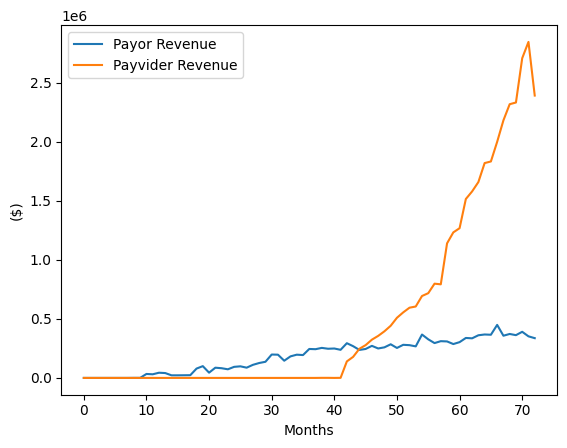

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('($)')
plt.plot(qt.revenue['payor']['subscriptions']+qt.revenue['payor']['nre'],label='Payor Revenue')
plt.plot(qt.revenue['payvider']['subscriptions']+qt.revenue['payvider']['nre'],label='Payvider Revenue')
# plt.plot(qt.expense[:71],label='Expense')
# plt.plot(qt.cogs_mo[:71]+qt.marketing_expense_mo[:71]+qt.sales_expense_mo[:71]+qt.rd_expense_mo[:71]+qt.ga_expense_mo[:71],label='sum')
# plt.plot(qt.cogs_mo[:71],label='COGS')
# plt.plot(qt.marketing_expense_mo[:71],label='Marketing Expense')
# plt.plot(qt.sales_expense_mo[:71],label='Sales Expense')
# plt.plot(qt.rd_expense_mo[:71],label='R&D Expense')
# plt.plot(qt.ga_expense_mo[:71],label='G&A Expense')
plt.legend(loc='best')
# plt.ticklabel_format(scilimits=(-5,8))

In [ ]:
churn_rates.shape

(72,)

In [ ]:
payor_contr_marg[:71]

array([     0. ,      0. ,      0. ,      0. ,      0. ,  -5166.5,
        -5166.5,  -5166.5, -10733. ,  -9733. , -16899.5,  30067. ,
        40467. ,  28067. ,  33900.5,  35734. ,  49934. ,  83300.5,
       124045.5, 154212. , 114818. , 194812. , 155418. , 257812. ,
       183218. , 208618. , 190424. , 252818. , 231618. , 211224. ,
       253830. , 247230. , 262824. , 292424. , 261830. , 254636. ,
       223439.5, 146044. , 225244. , 250644. , 274844. , 264449.5,
       292255. , 289455. , 278455. , 329255. , 306455. , 350855. ,
       360055. , 349055. , 408655. , 450655. , 458255. , 489855. ,
       353293.5, 210721. , 185532. , 139543. , 176743. , 171543. ,
       191943. , 183543. , 211943. , 270743. , 236743. , 231543. ,
       368743. , 324543. , 313943. , 261743. , 233543. ])

In [ ]:
np.concatenate([np.zeros(11),np.convolve(qt.payors_churned[:71],np.ones(12,dtype=int),'valid')])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.,
       24., 24., 25., 26., 27., 28.])

In [ ]:
np.cumsum(qt.payors_churned[:71])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38.,
       40., 42., 45., 48., 51., 54.])

In [ ]:
np.roll(num_total_payors[:71],12)[39]

10.0

In [ ]:
payor_yr_to_dt_ltv[22:25]

array([            nan, 120049.10377358, 117939.29166667])

In [ ]:
payvider_yr_to_dt_ltv[51:57]

array([            nan, 957003.86792453, 940180.5       , 934968.01470588,
       931603.88157895, 938353.0952381 ])

In [ ]:
payvider_yr_to_dt_unit_contr_marg

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                  -inf,            -inf,            -inf,            -inf,
        70995.        , 131241.33333333, 165037.2       , 167439.375     ,
       173488.72727273, 187659.64285714, 194601.5       , 193029.82608696,
       193650.35714286, 197171.72727273, 197432.23076923, 194240.19565217,
       191400.77358491, 1

In [ ]:
qt.idns_churned[:71]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
payor_yr_to_dt_churn_rates

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1       ,
       0.18181818, 0.25      , 0.33333333, 0.38461538, 0.4       ,
       0.4375    , 0.47058824, 0.5       , 0.52631579, 0.52380952,
       0.52173913, 0.5       , 0.46153846, 0.48148148, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.48979592, 0.48      , 0.49019608, 0.5       , 0.50943396,
       0.50909091])

In [ ]:
qt.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 2., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 1., 2., 3., 3., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 0.])

In [ ]:
#LTV/CAC
#Contribution margin = rev-cogs (gross margin)
#

cust_labels = np.array([f'Q{i}' for i in np.arange(1,25)])
cust_labels[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
total_num_payors = np.cumsum(qt.num_payors_acquired[:71])-np.cumsum(qt.payors_churned[:71])
q_markers = list(np.arange(2,72,3))
y_markers = q_markers[3::4]
del q_markers[3::4]
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(72), y=total_num_payors,
                    mode='lines',
                    name=''))

fig.add_trace(go.Scatter(
    x=q_markers,
    y=rolling_12_mo[q_markers],
    mode='markers'
))
fig.add_trace(go.Scatter(
    x=y_markers,
    y=rolling_12_mo[y_markers],
    mode='markers'
))
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(np.arange(2,72,3)),
        ticktext = cust_labels
    ),
    showlegend=False,
    title='ARR',
    xaxis_title='Quarter/Year',
    yaxis_title='[$]'
)
fig.show()

In [ ]:
#Sales Expense vs. Marketing Expense vs. COGS
import plotly.express as px

fig = px.line(rolling_av_df_new, facet_col="Country", facet_col_wrap=2)
fig.add_hline(y=0, line_dash="dot")

fig.add_vrect(x0="2007-01", x1="2008-12", col=[1,2],
              annotation_text="2007-2008 Financial Crisis", annotation_position="top left",
              fillcolor="red", opacity=0.25, line_width=0)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

df = pd.Dataframe([qt.revenue[:72],qt.expense[:72]])
fig = px.line(df, x='date', y="GOOG")

fig.update_xaxes(minor=dict(ticks="inside", showgrid=True))

fig.show()

([<matplotlib.axis.XTick at 0x7bc943c85150>,
 [Text(3, 0, 'Q1'),
  Text(6, 0, 'Q2'),
  Text(9, 0, 'Q3'),
  Text(12, 0, 'Y1'),
  Text(15, 0, 'Q5'),
  Text(18, 0, 'Q6'),
  Text(21, 0, 'Q7'),
  Text(24, 0, 'Y2'),
  Text(27, 0, 'Q9'),
  Text(30, 0, 'Q10'),
  Text(33, 0, 'Q11'),
  Text(36, 0, 'Y3'),
  Text(39, 0, 'Q13'),
  Text(42, 0, 'Q14'),
  Text(45, 0, 'Q15'),
  Text(48, 0, 'Y4'),
  Text(51, 0, 'Q17'),
  Text(54, 0, 'Q18'),
  Text(57, 0, 'Q19'),
  Text(60, 0, 'Y5'),
  Text(63, 0, 'Q21'),
  Text(66, 0, 'Q22'),
  Text(69, 0, 'Q23'),
  Text(72, 0, 'Y6')])

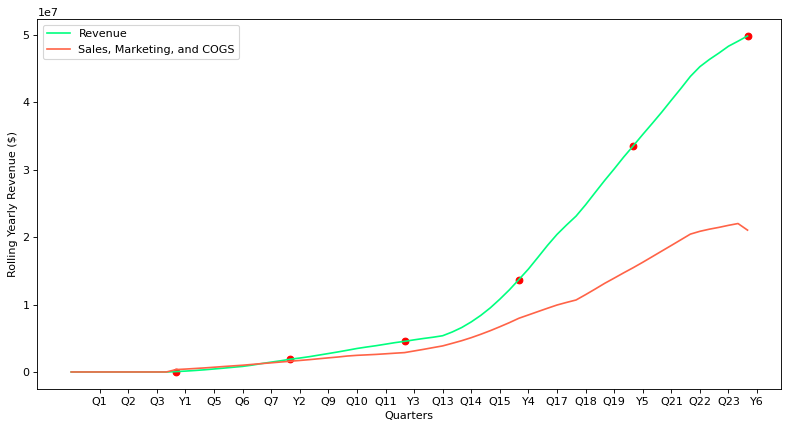

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
plt.xlabel('Quarters')
plt.ylabel('Rolling Yearly Revenue ($)')
rolling_12_mo = np.concatenate([np.zeros(11),np.convolve(qt.revenue[:72],np.ones(12,dtype=int),'valid')])
rolling_12_mo_exp = np.concatenate([np.zeros(11),np.convolve(qt.expense[:72],np.ones(12,dtype=int),'valid')])
plt.plot(rolling_12_mo,label='Revenue',color='springgreen')
plt.plot(rolling_12_mo_exp,label='Sales, Marketing, and COGS',color='tomato')
plt.legend(loc='best')
xt = list(np.arange(3,73,3))
# xt+=[11,23,35,47,59,71]

xtl = np.array([f'Q{i}' for i in np.arange(1,25)])
xtl[[3,7,11,15,19,23]]=['Y1','Y2','Y3','Y4','Y5','Y6']
plt.scatter([11,23,35,47,59,71],rolling_12_mo[[11,23,35,47,59,71]],color='r',marker='o')
plt.xticks(xt,labels=xtl)

In [ ]:
len(xt)

35

In [ ]:
(.1*rolling_12_mo[23])//(qt.customer_satisfaction_exp_mo*12)

2.0

In [ ]:
rolling_12_mo[[12,24]]

array([ 114200., 1629200.])

In [ ]:
np.concatenate([np.zeros(11),np.convolve(qt.revenue[:60],np.ones(12,dtype=int),'valid')]).shape

(60,)

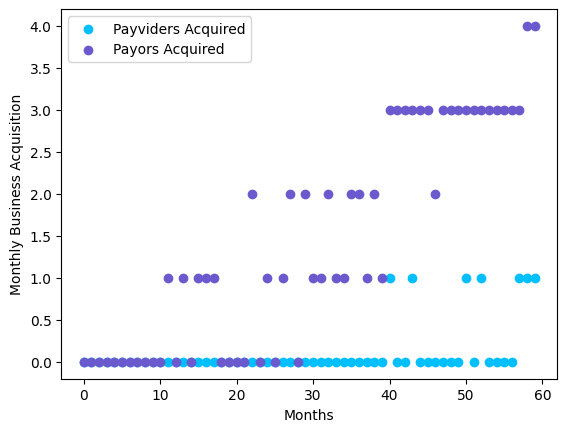

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Monthly Business Acquisition')
plt.scatter(np.arange(60),qt.num_idns_acquired[:60],label='Payviders Acquired',color='deepskyblue')
plt.scatter(np.arange(60),qt.num_payors_acquired[:60],label='Payors Acquired',color='slateblue')
plt.legend(loc='best')
# plt.ticklabel_format(scilimits=(-5,8))

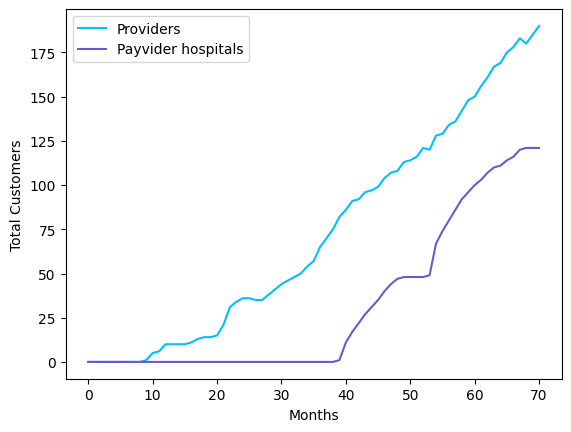

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.plot(np.arange(71),qt.num_providers_total[:71],label='Providers',color='deepskyblue')
plt.plot(np.arange(71),qt.num_idn_hospitals_total[:71],label='Payvider hospitals',color='slateblue')
plt.legend(loc='best')

In [ ]:
# np.sum(
qt.payor_cogs_capacities

[array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 2.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),
 array([1., 1., 6.]),


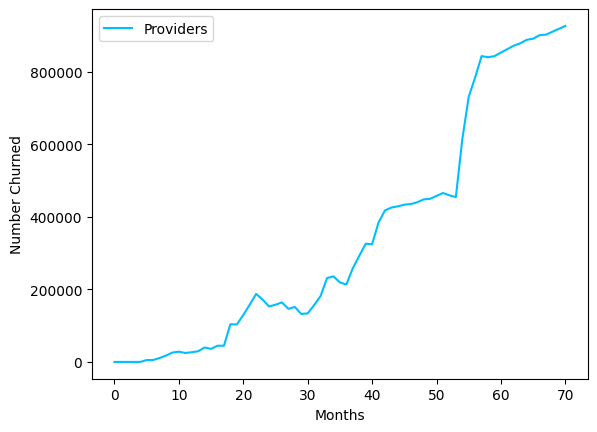

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Number Churned')
# plt.plot(np.arange(71),qt.payors_churned[:71],label='Providers',color='deepskyblue')
# plt.plot(np.arange(71),qt.idns_churned[:71],label='Payvider hospitals',color='slateblue')
# plt.plot(np.arange(71),(qt.hosting_expense_provider_mo*qt.num_providers_total)[:71],label='Providers',color='deepskyblue')
# plt.plot(np.arange(71),(qt.payor_cogs_capacities*qt.payor_cogs_salaries)[:71],label='Providers',color='deepskyblue')
plt.plot(np.arange(71),(qt.payor_cogs_mo)[:71],label='Providers',color='deepskyblue')
# plt.plot(np.arange(71),num_total_payors[:71],label='Providers',color='deepskyblue')
# plt.plot(np.arange(71),payvider_churn_rates[:71],label='Payvider hospitals',color='slateblue')
plt.legend(loc='best')

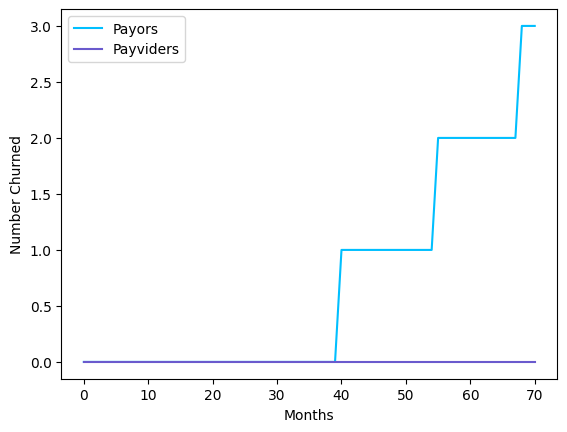

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Number Churned')
plt.plot(np.arange(71),qt.payors_churned[:71],label='Payors',color='deepskyblue')
plt.plot(np.arange(71),qt.idns_churned[:71],label='Payviders',color='slateblue')
plt.legend(loc='best')

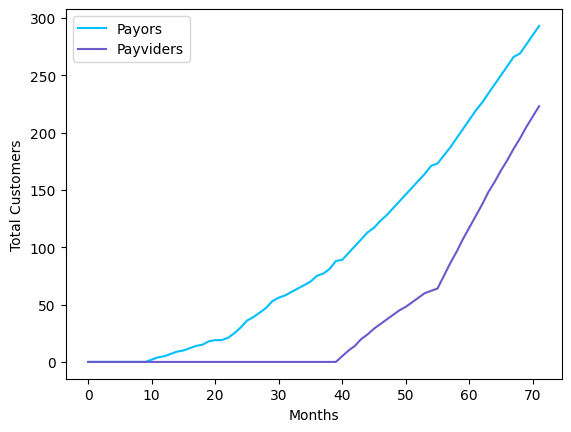

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Months')
plt.ylabel('Total Customers')
plt.plot(np.arange(72),np.cumsum(qt.num_providers_acquired[:72])-qt.providers_churned[:72],label='Payors',color='deepskyblue')
plt.plot(np.arange(72),np.cumsum(qt.num_idn_hospitals_acquired[:72]-qt.idn_hospitals_churned[:72]),label='Payviders',color='slateblue')
plt.legend(loc='best')

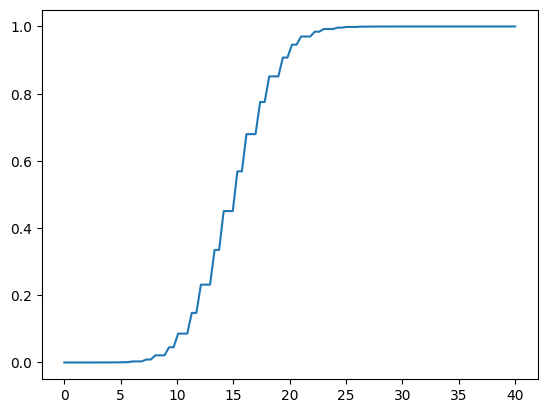

In [ ]:
#gt cdf of binomial
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bernoulli
x = np.linspace(0,40,100)
cdf = stats.binom.cdf
plt.plot(x,cdf(x, 60, 0.25))
plt.show()

In [ ]:
stats.binom.rvs(60,.25,1)

15

Text(0.5, 1.0, 'Exponential function')

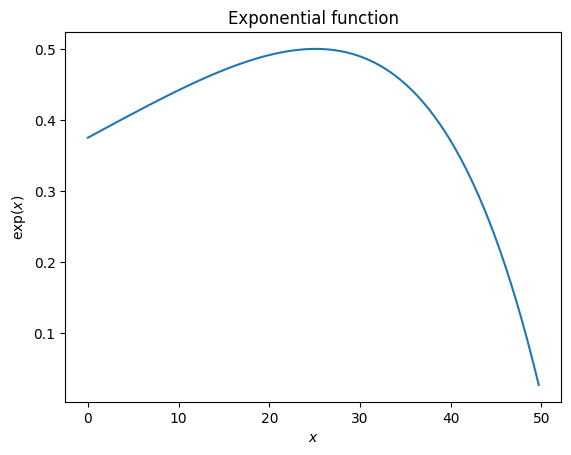

In [ ]:
N=60
x = np.linspace(0,60,100)
y = np.exp(x)

plt.figure()
plt.plot(x,stats.binom.pmf(1,2,.25*((1+(.028))**x)))
plt.xlabel("$x$")
plt.ylabel(r"$\exp(x)$")
plt.title("Exponential function")

In [ ]:
350*40

14000

In [ ]:
bernoulli.rvs(.5,1)

1

In [ ]:
import pandas as pd
Q3_2023_dom_flights_df = pd.read_excel('/content/US Domestic Flight Data.xlsx', names=['2022 Passenger Rank'	,'Airport Code'	,'City Name'	,'State Name'	,'Average Fare ($)','Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)'],header=None)

In [ ]:
Q3_2023_dom_flights_df['Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)'].quantile(q=.25)

375.29

In [ ]:
import scipy
ny_adr = 301.22
av_adr = 155.62
(ny_adr-av_adr)/scipy.stats.norm.ppf(.95)

88.5185147263536